In [3]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import median
from scipy import stats


import re

In [4]:
tdata=pd.read_csv('train.csv')
# tdata.info()

descript=open("data_description.txt",'r')
descript=descript.read()
strngDesc=descript.split(':')
desc={}
l=len(strngDesc)
for n,i in enumerate(strngDesc):
    if n==l-1:
        continue
    desc[i.split('\n')[-1]]=' '.join(strngDesc[n+1].split(' ')[:-1])

print(desc['Fence'])

 Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No


## Large Number Of Features and Categorical Properties

### As the number of features were extremly large ,the description of abbreviated Features and category were hard to find and get hold of, So we decided to scrap the 'data_description.txt' file in such a wat that features and Description  were put in Key value pair formation.

In [101]:
tdata.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

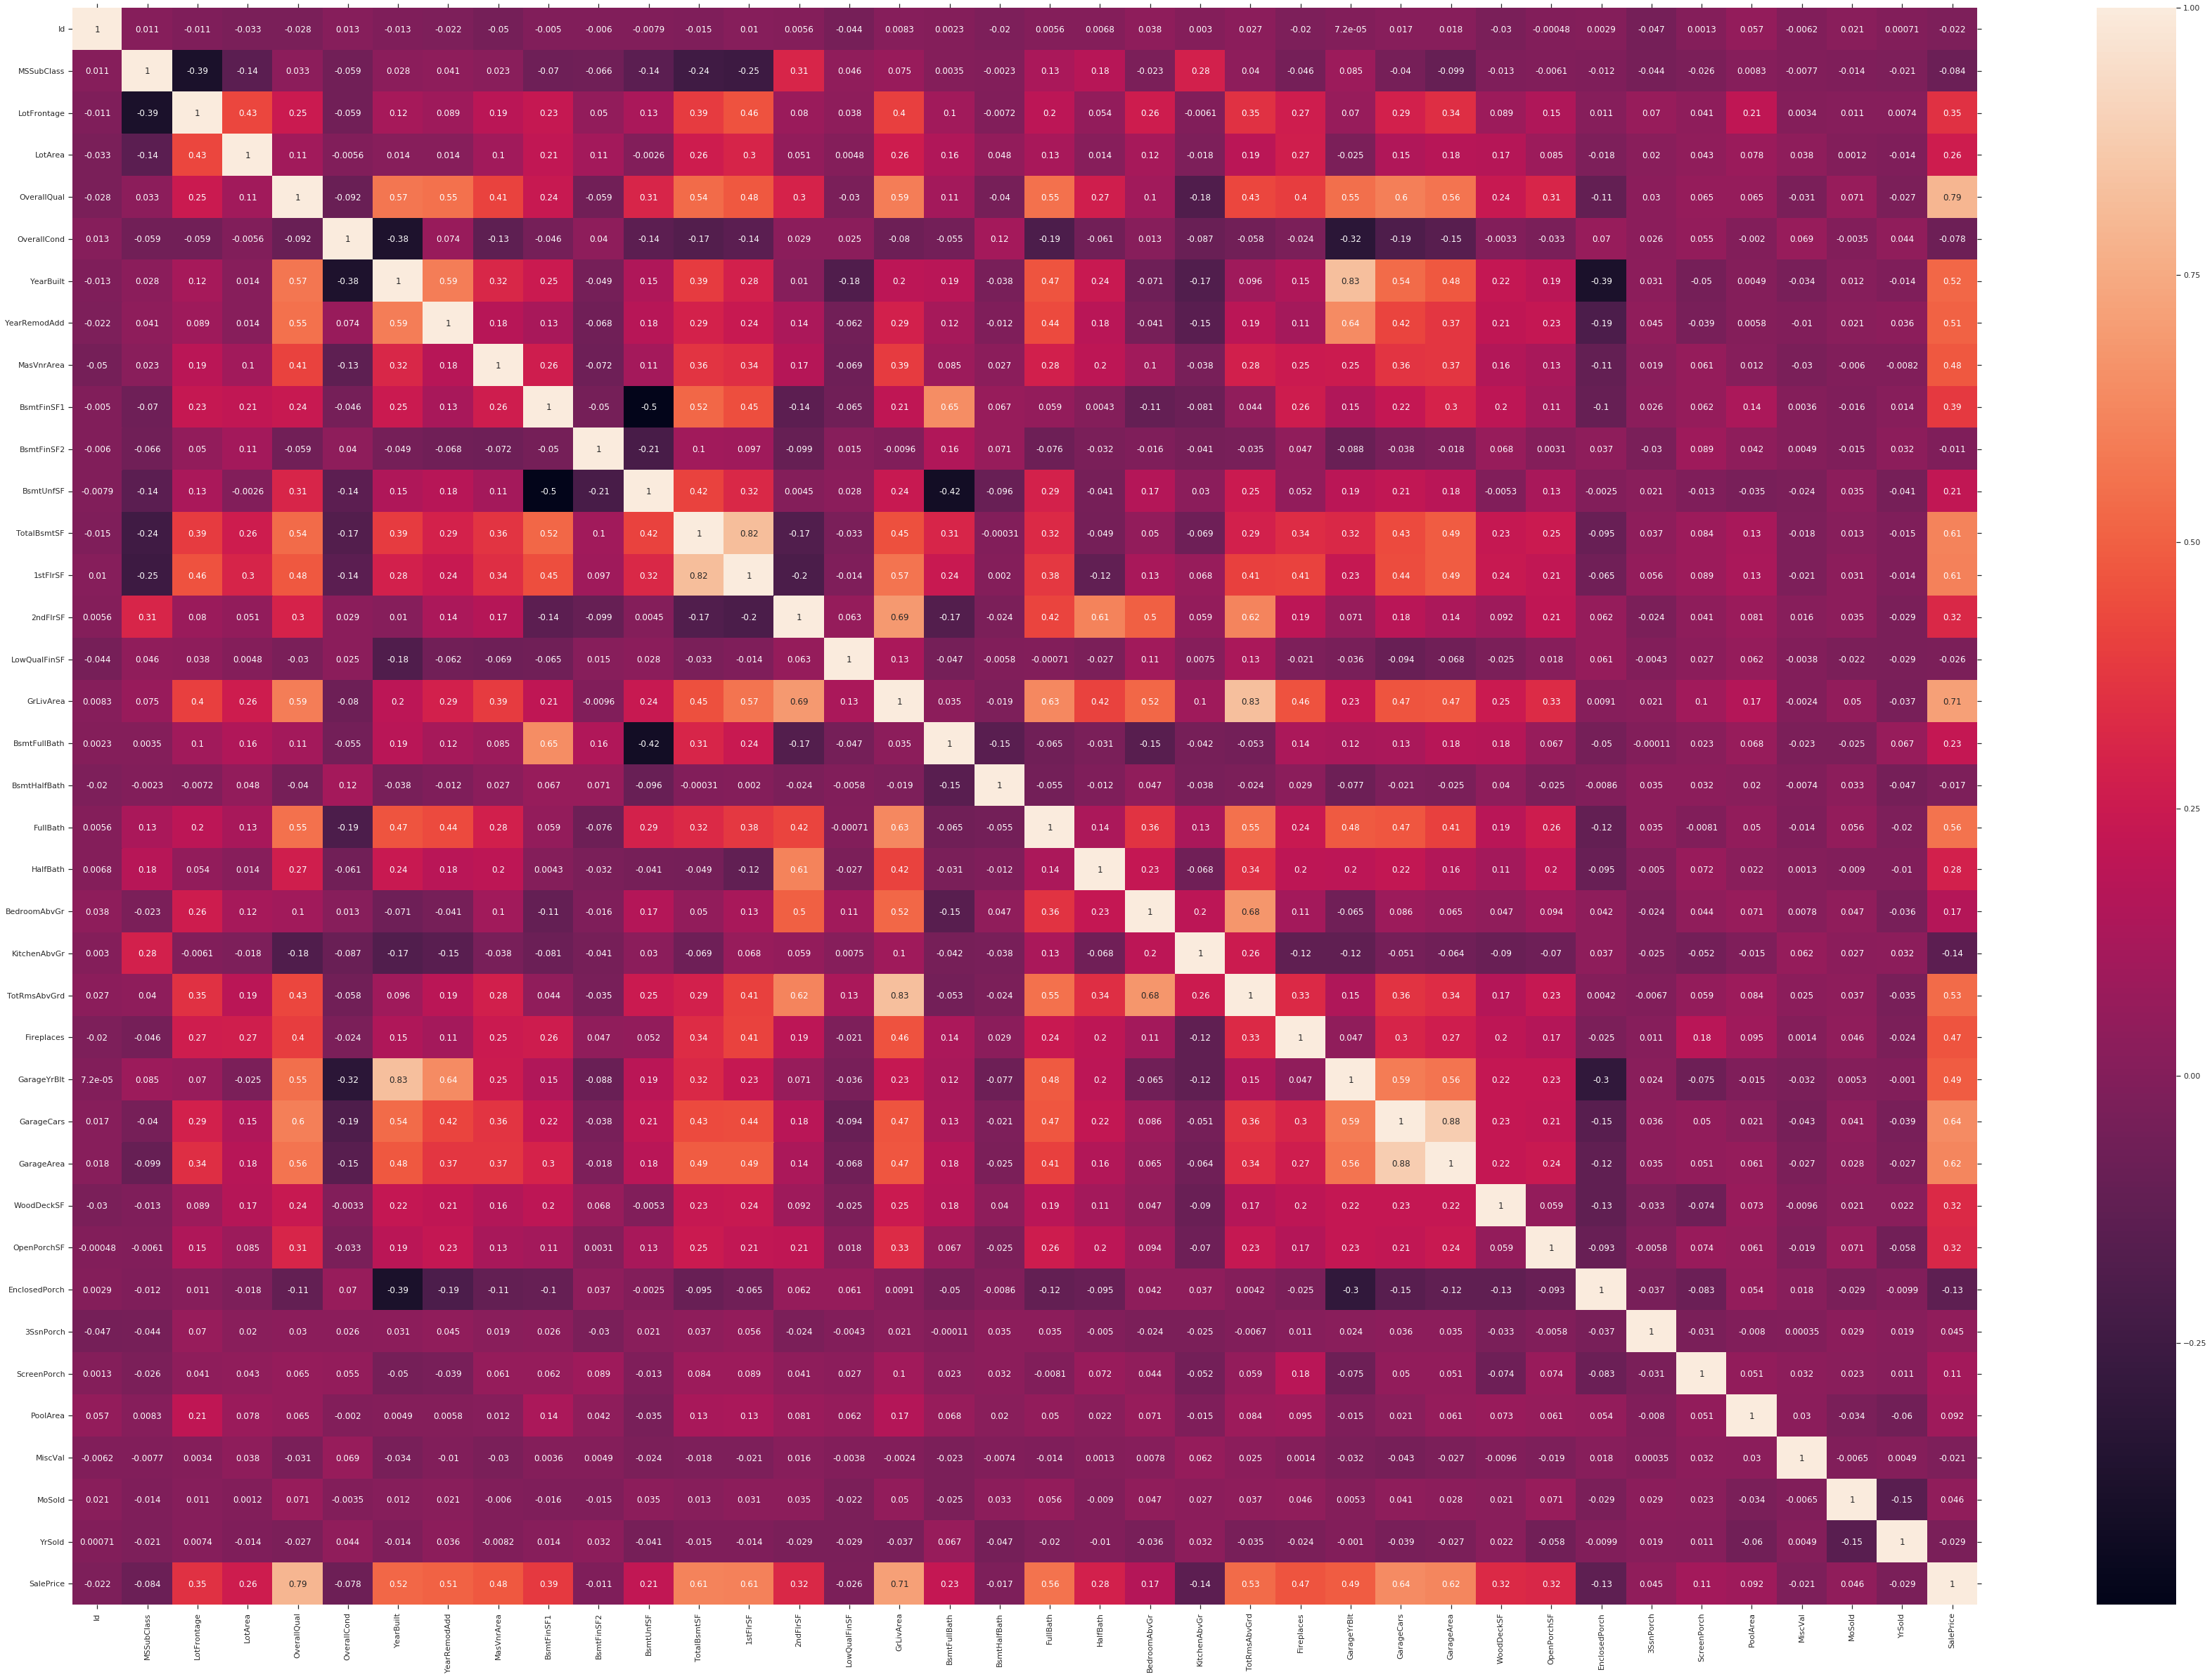

In [88]:
sns.set(palette=None, rc={'figure.figsize':(60.7,40.7)})

sns.heatmap(tdata.corr(),annot=True)

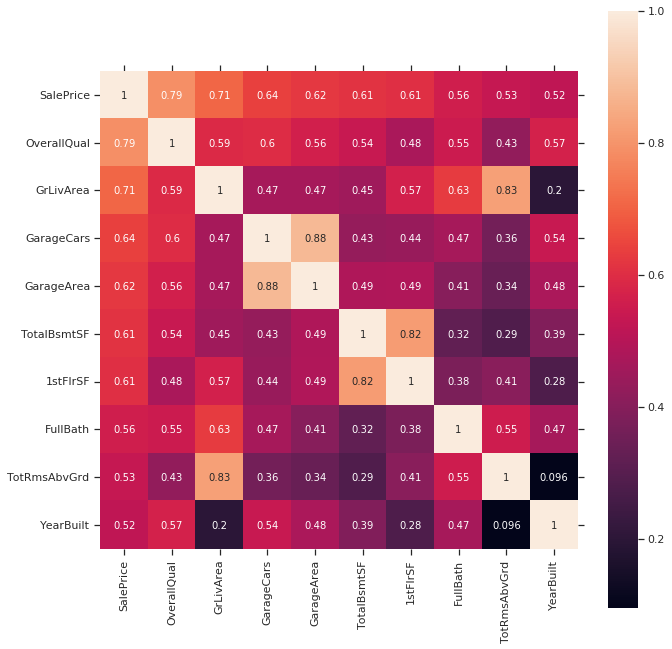

In [41]:
sns.set(palette=None, rc={'figure.figsize':(10.7,10.7)})


largestSaleP=tdata.corr().nlargest(10,'SalePrice')['SalePrice'].index
cm=np.corrcoef(tdata[largestSaleP].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, annot_kws={'size': 10}, yticklabels=largestSaleP.values, xticklabels=largestSaleP.values)

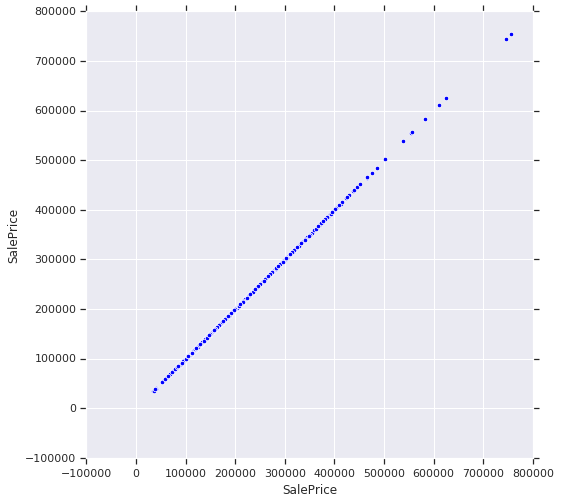

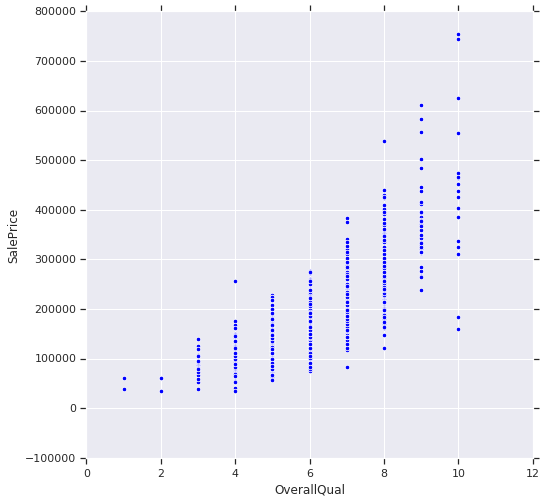

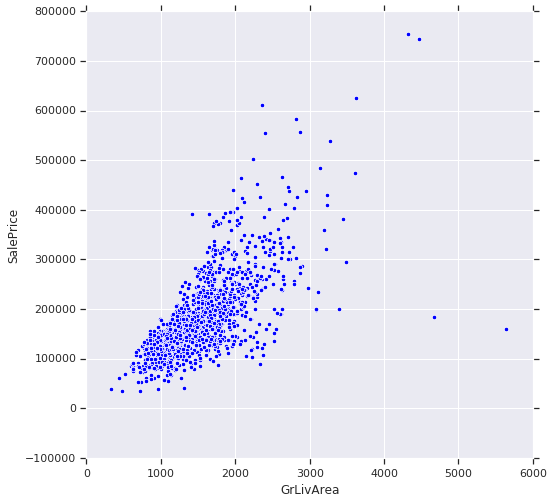

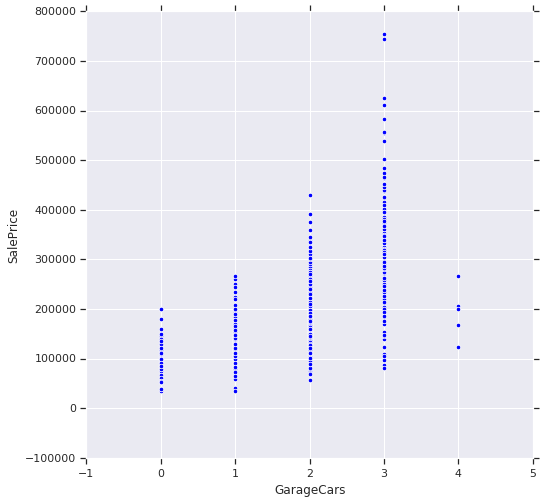

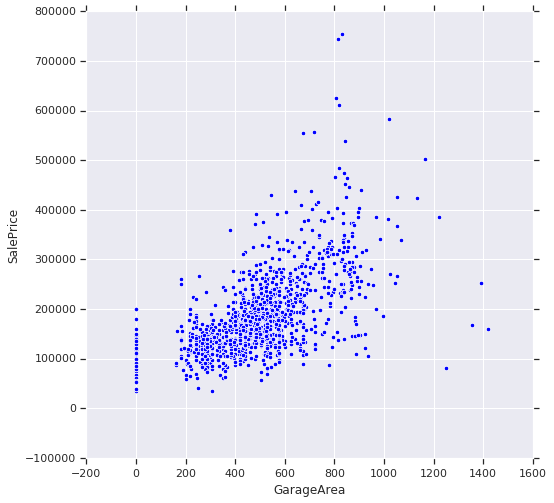

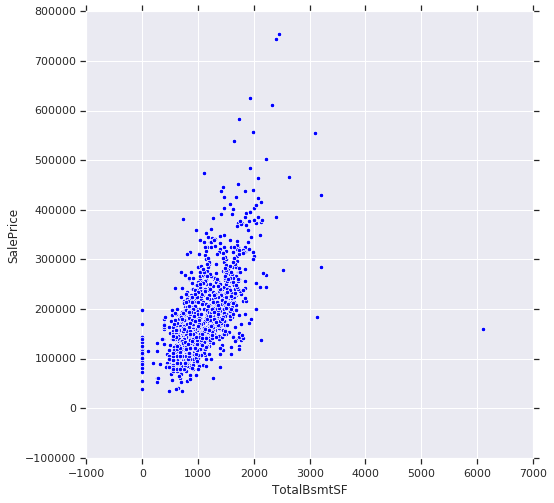

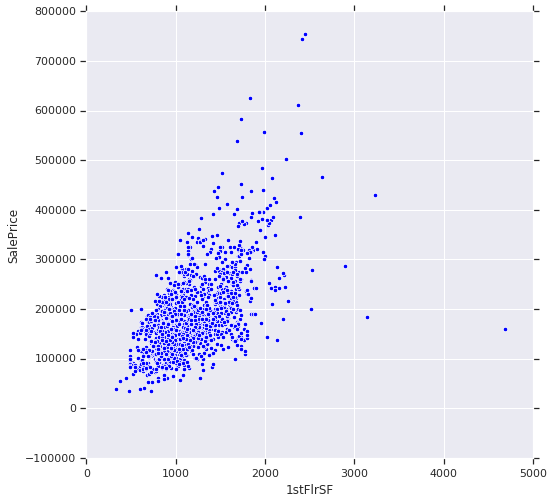

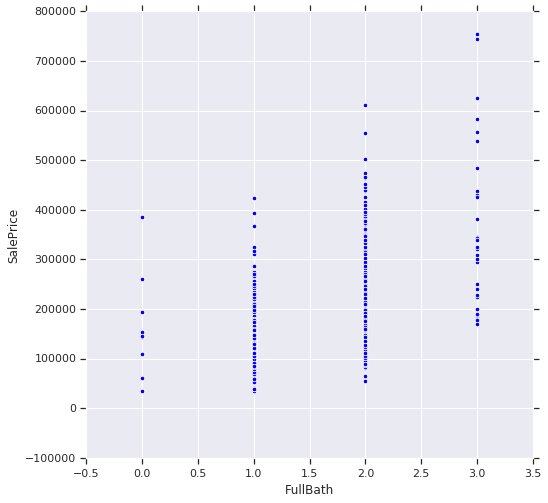

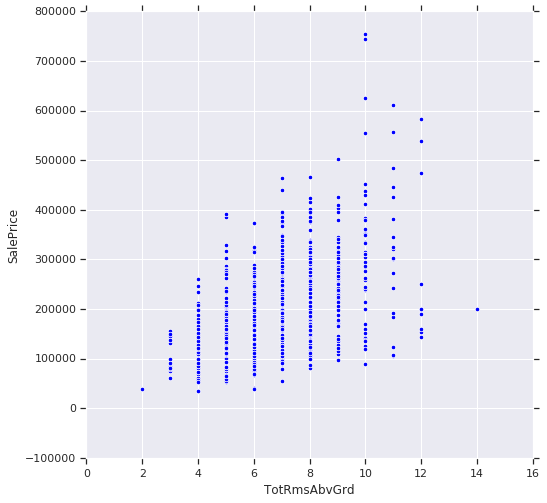

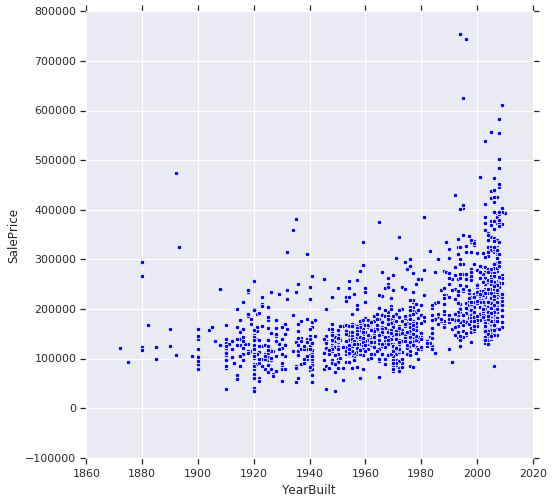

In [46]:
for i in largestSaleP:
    plt.figure(figsize=(8,8))
    sns.scatterplot(x=i,y='SalePrice',data=tdata[largestSaleP])

# Taking the 10 features  highly correlated  with 'SalePrice'

### There were significant revelations regarding data when the correlations came out, the 'OverallQual' showed most correlation with the 'SalePrice' which is a complex feature , we do not now how the quality was scaled and determined in the survey.

### The 'GrLivArea' was the second in the list,  which is the living Area above ground. This feature accounts for multistoried houses , however there is another categorical feature which serves similar data 'HouseStyle' 

### 'GarageCars' and 'GarageArea' accounts for number of  cars the garage can accomodate and the area of the garage, which are directly dependent to each other.

### 'TotalBsmtSF' is the measure of total surface area of the basement and "1stFlrSF' is the First floor surface area which are somewhat linked to  "LotArea"

### "YearBuilt' is directly correlated to the "SalePrice" so ,newer houses seemed to have higher prices

BsmtFinType1             : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No BsmtFinType1' 'LwQ']
FireplaceQu             : ['No FireplaceQu' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
MasVnrType             : ['BrkFace' 'None' 'Stone' 'BrkCmn' 'No MasVnrType']
Electrical             : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'No Electrical']
BsmtCond             : ['TA' 'Gd' 'No BsmtCond' 'Fa' 'Po']
GarageType             : ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No GarageType' 'Basment' '2Types']
BsmtQual             : ['Gd' 'TA' 'Ex' 'No BsmtQual' 'Fa']
BsmtFinType2             : ['Unf' 'BLQ' 'No BsmtFinType2' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Fence             : ['No Fence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Alley             : ['No Alley' 'Grvl' 'Pave']
GarageCond             : ['TA' 'Fa' 'No GarageCond' 'Gd' 'Po' 'Ex']
BsmtExposure             : ['No' 'Gd' 'Mn' 'Av' 'No BsmtExposure']
GarageQual             : ['TA' 'Fa' 'Gd' 'No GarageQual' 'Ex' 'Po']
PoolQC             : ['No PoolQC' 'Ex' 'Fa' 'Gd']
MiscFeature             :

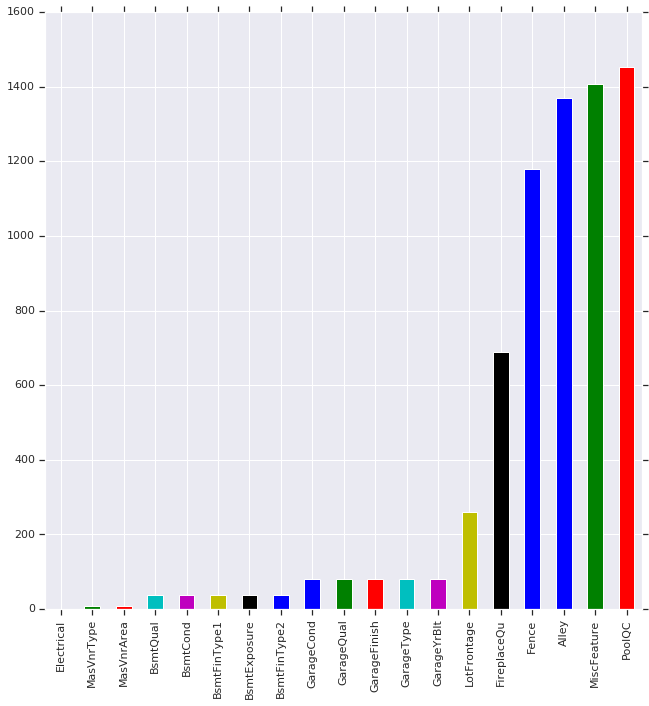

In [5]:
feat=tdata.columns.values
nan_features=tdata.isnull().sum()
nan_features=nan_features[nan_features>0]
nan_features.sort_values().plot.bar()
# display(nan_features.keys())
for i in (set(nan_features.keys())-(set(tdata.corr().columns.values))):
    tdata[i].fillna("No"+" "+i,inplace=True)
    print(i,"            :",tdata[i].unique())
# tdata.info()
# tdata.LotFrontage


# Putting "NaN" values under Spotlight

### Above Graph shows the count of 'NaN' values present in every feature

### The feature with most 'NaN' is the 'PoolQC' where "NaN' represented 'no pool'


# Observing the Categorical features with "NaN" values 

### The above list shows the unique values of the categorical features with 'NaN' values which helps with the further treatment of "NaN" Values 

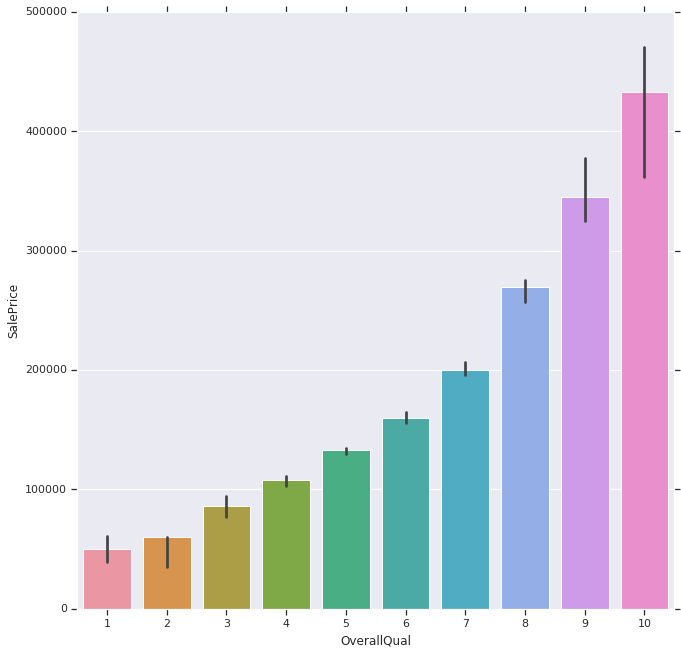

In [6]:
fig, ax = plt.subplots()
# sns.scatterplot(y=tdata['SalePrice'],x=tdata['OverallQual'],ax=ax)
sns.barplot(y=tdata['SalePrice'],x=tdata['OverallQual'],estimator=median)

In [6]:
sns.set(palette=None, rc={'figure.figsize':(5.7,5.7)})
categorical=list(set(tdata.columns.values)-set(tdata.corr().columns.values))


# Quality & Conditions

### The Features with 'Conditions'  and 'Quality' attached to it were generally positively correlated with the 'SalePrice'
### 

In [47]:
print(desc['GarageQual'])

 Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No


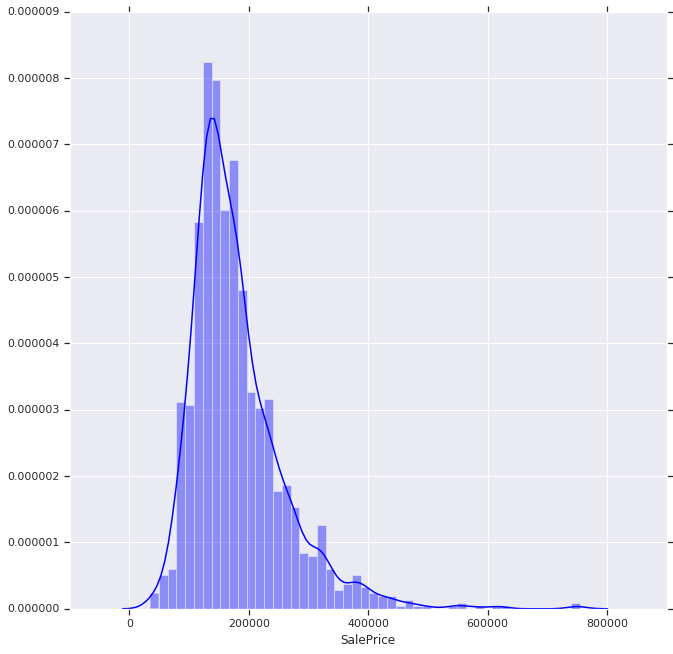

In [98]:
sns.distplot(tdata['SalePrice']);

/home/bean/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


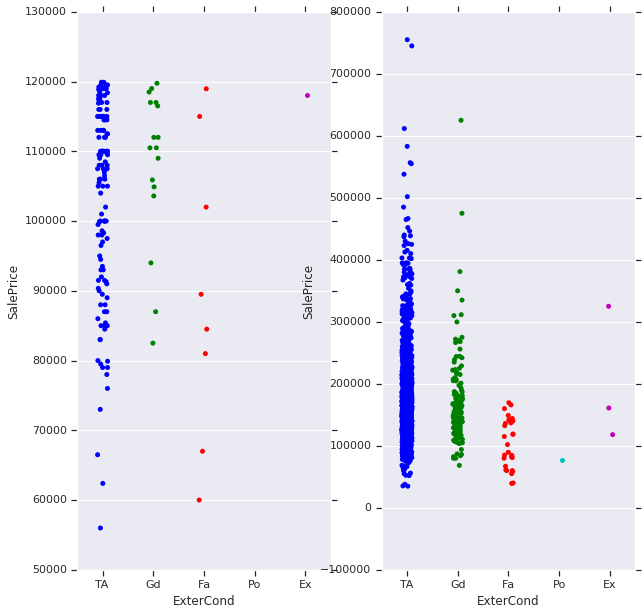

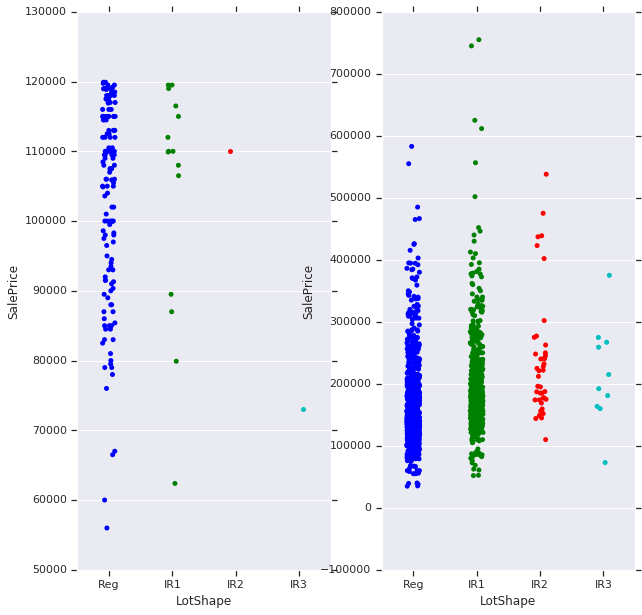

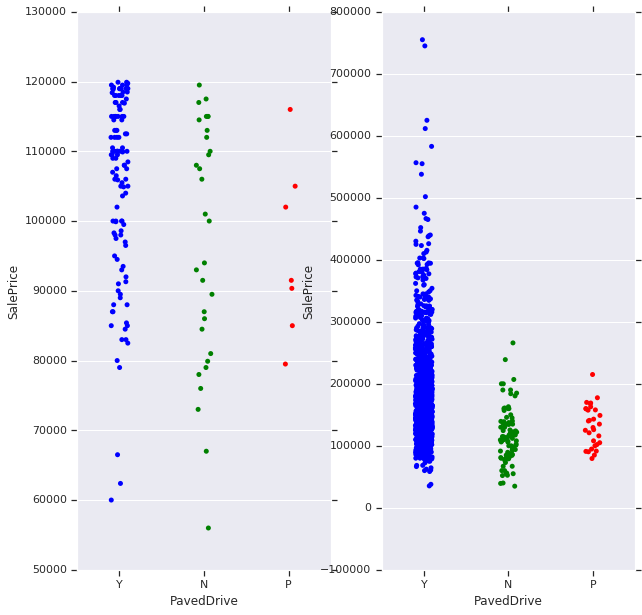

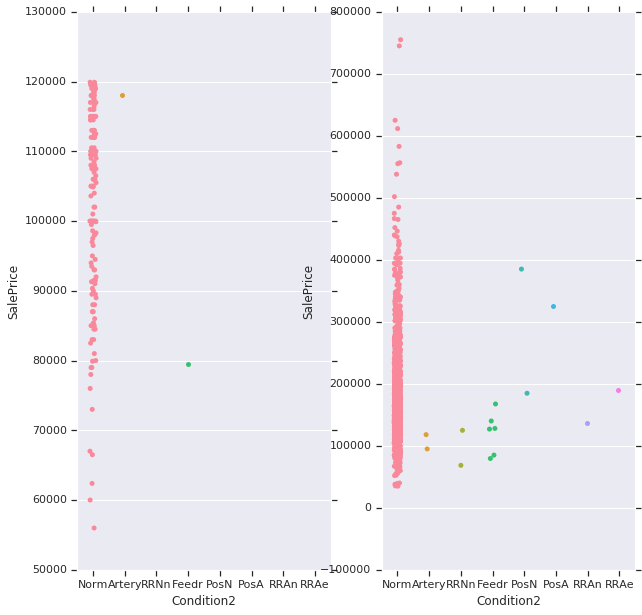

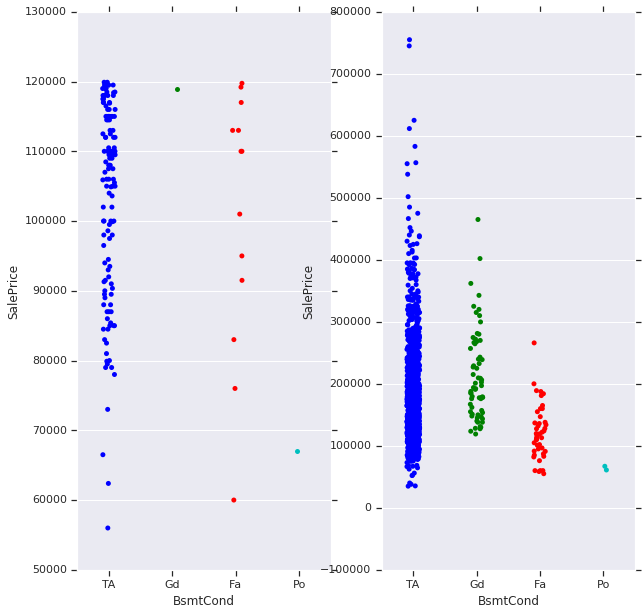

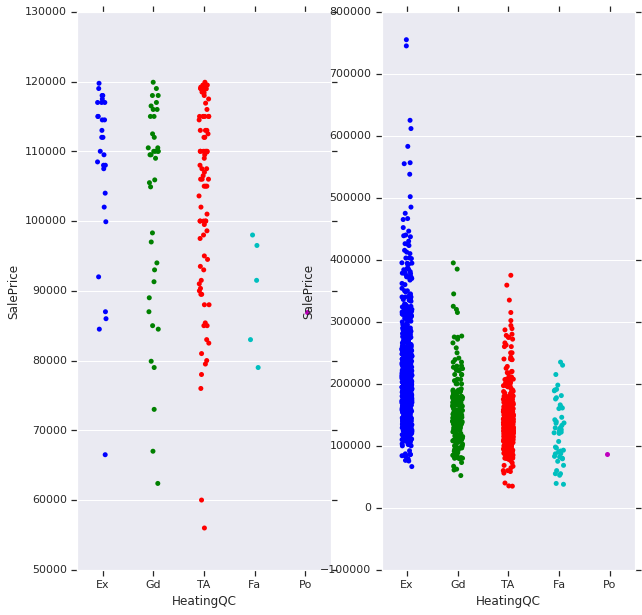

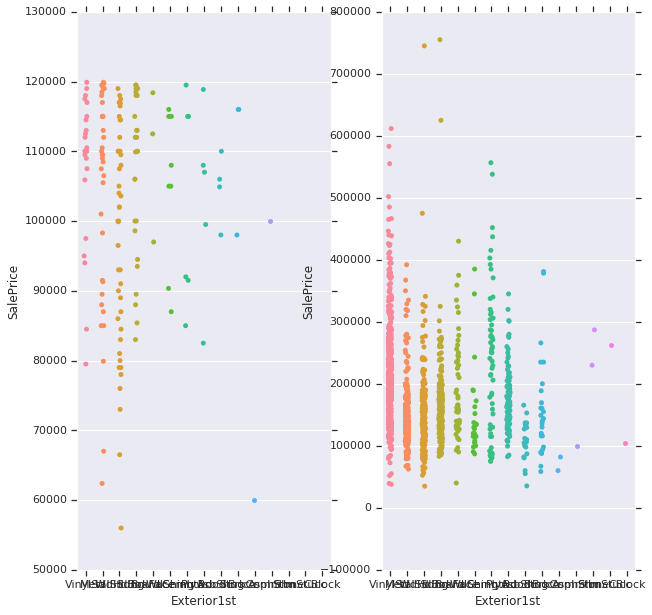

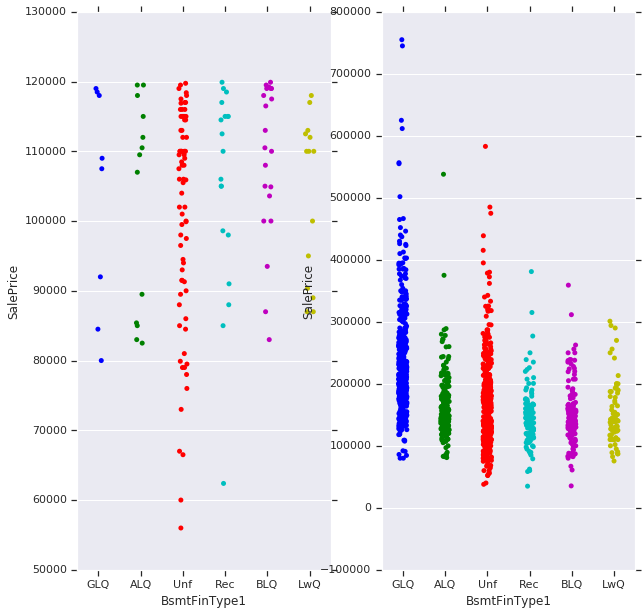

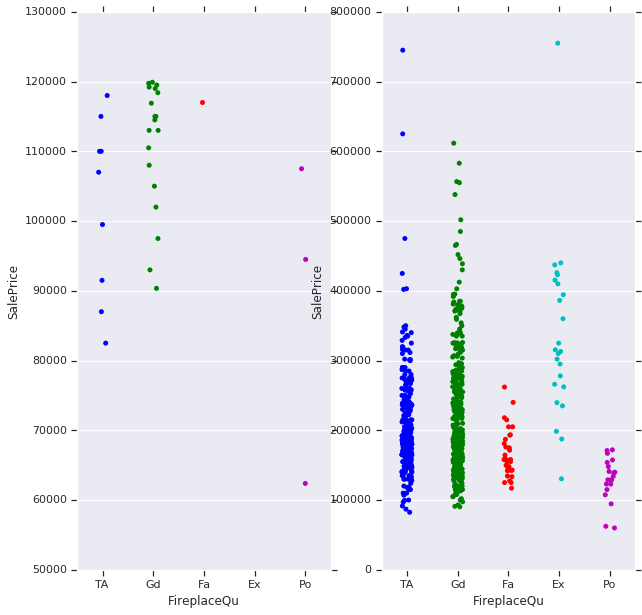

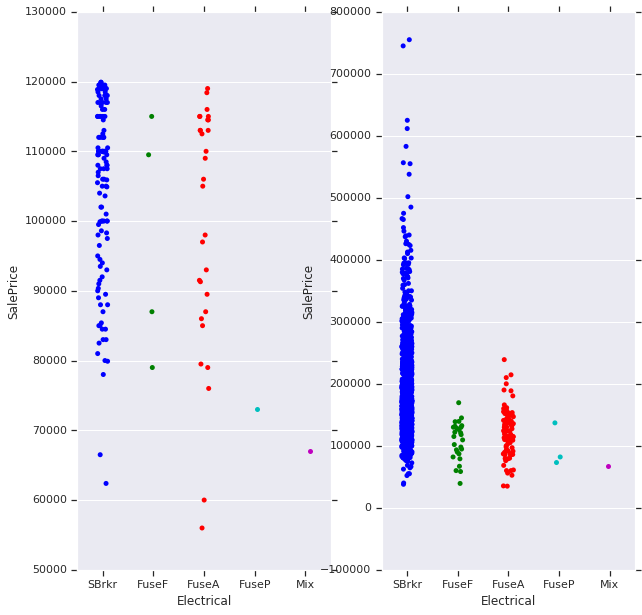

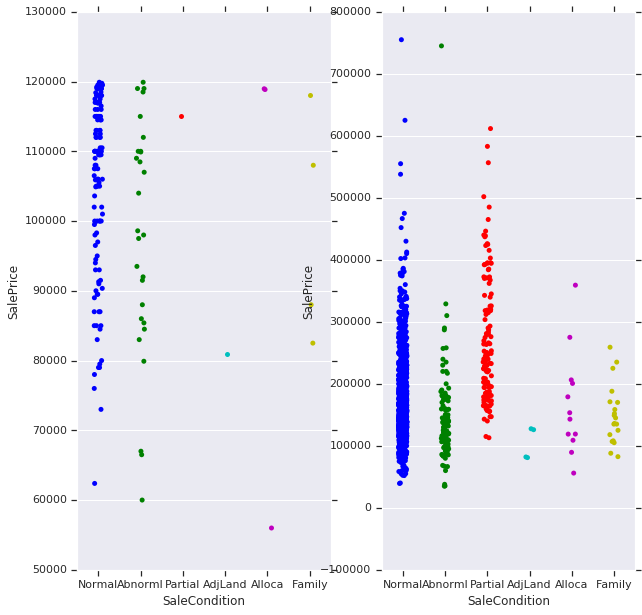

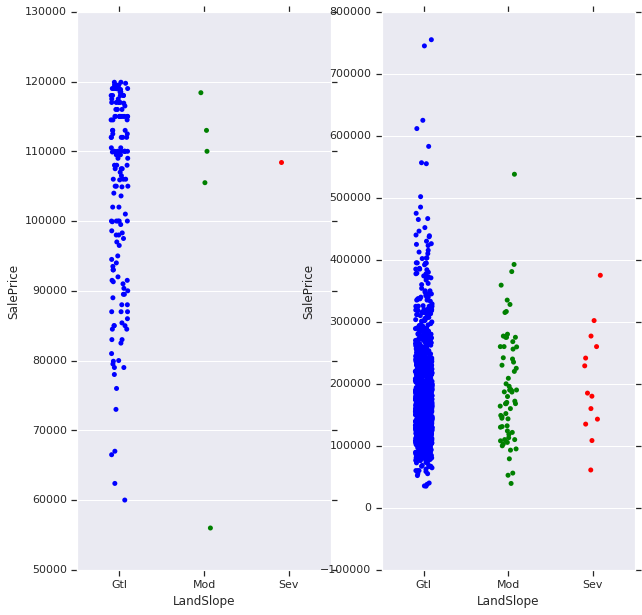

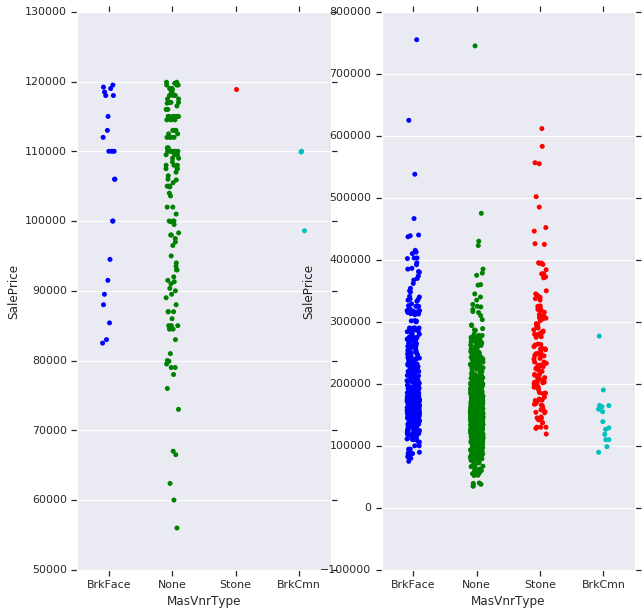

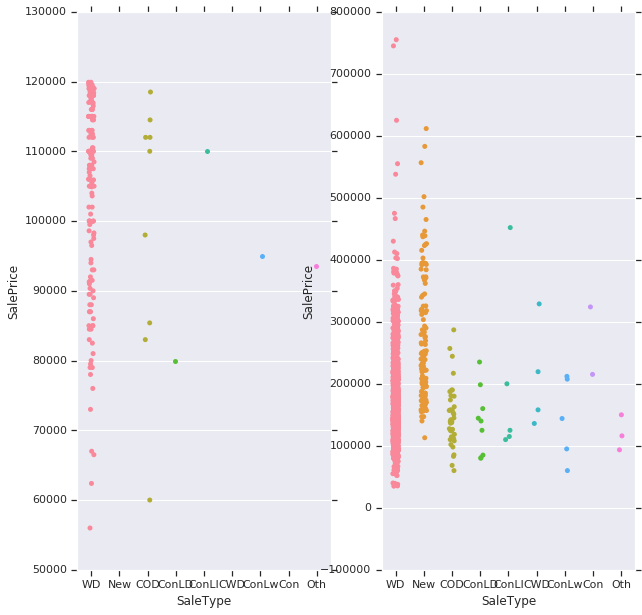

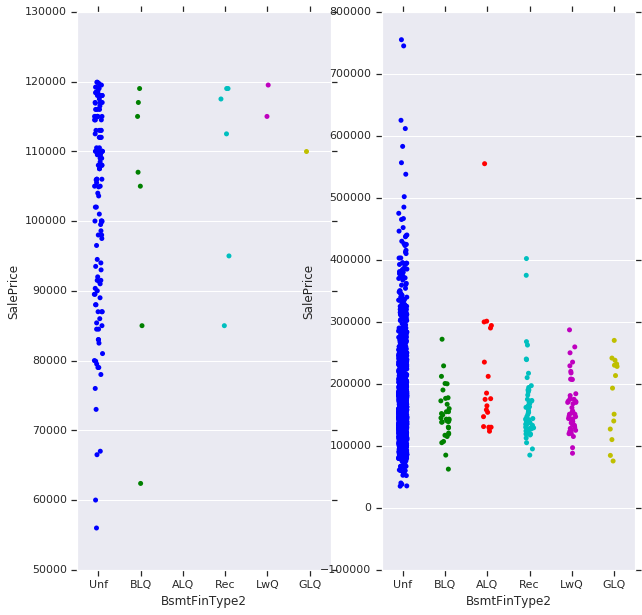

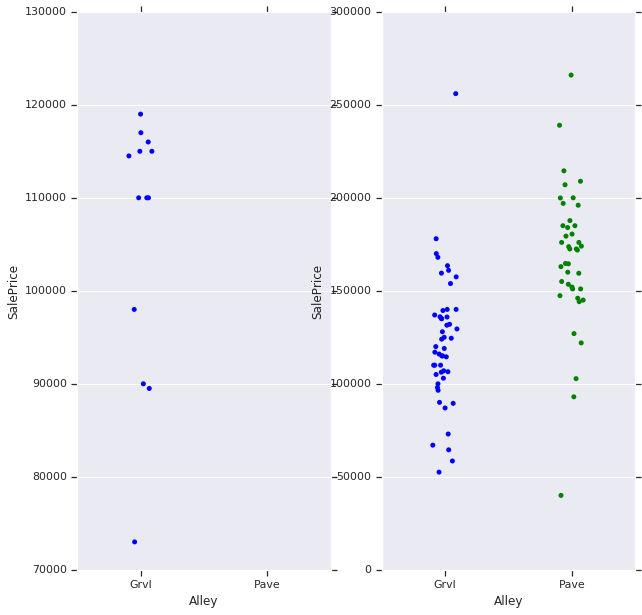

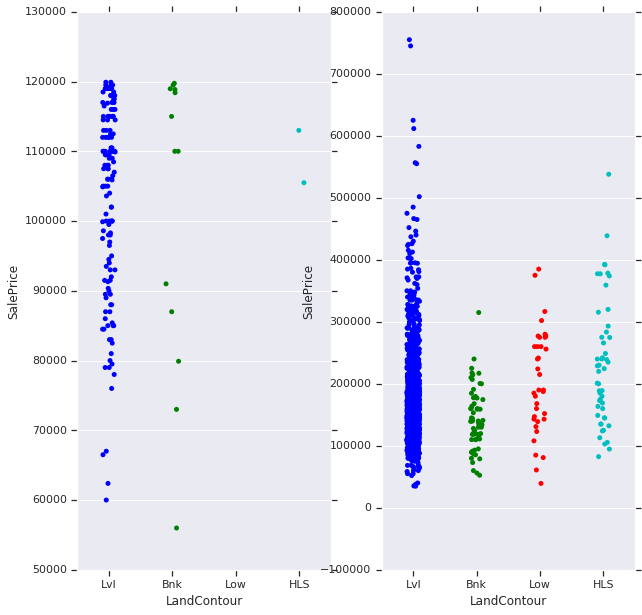

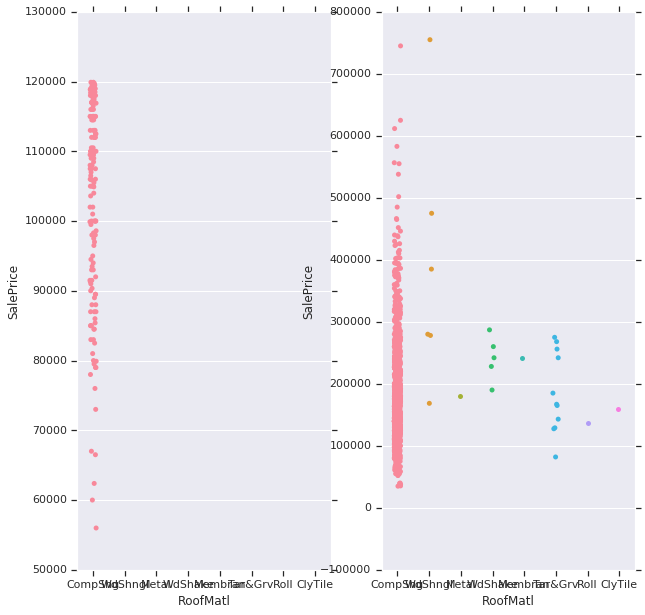

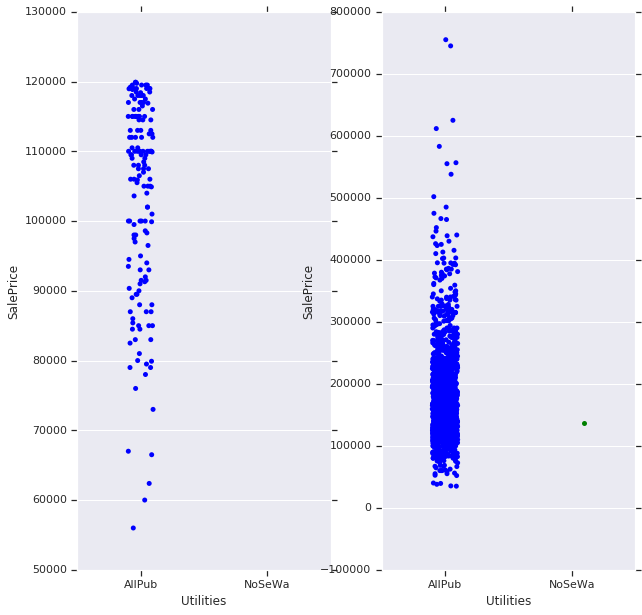

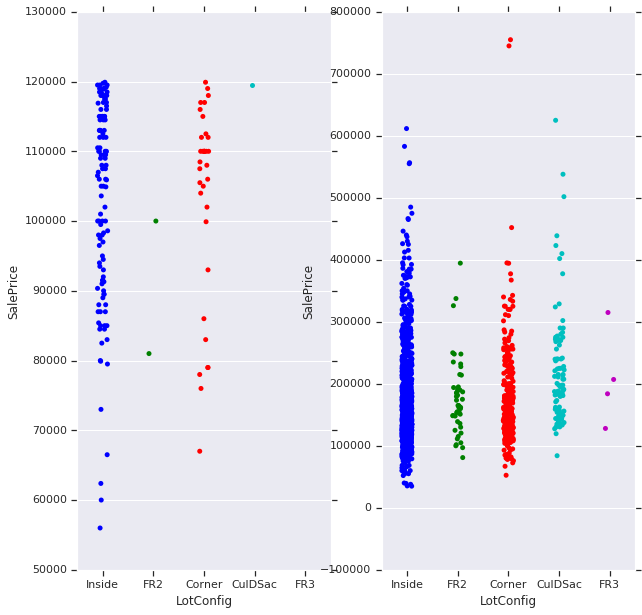

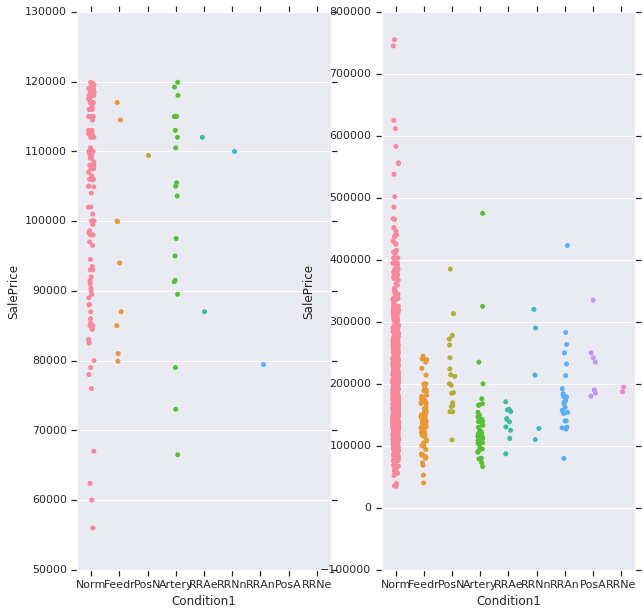

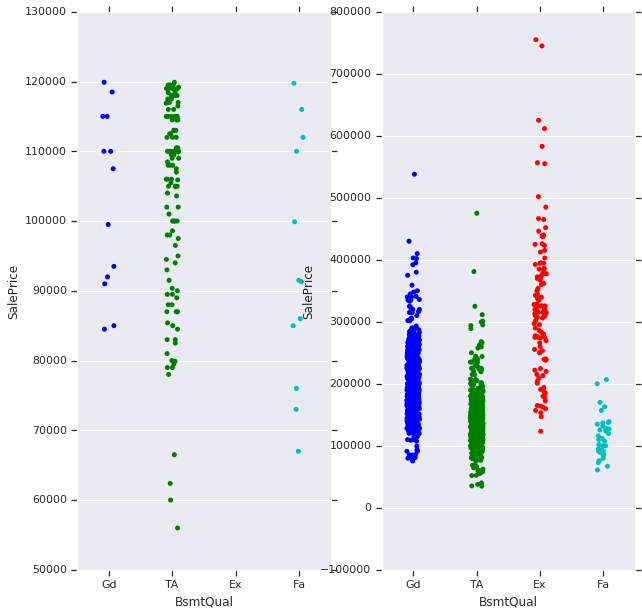

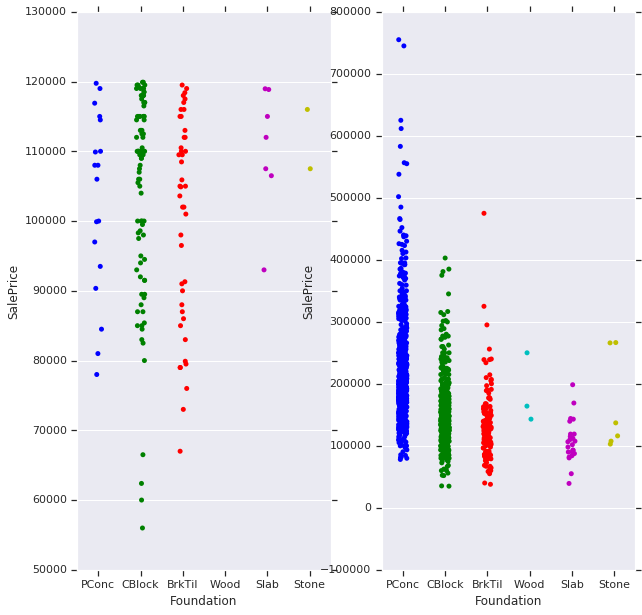

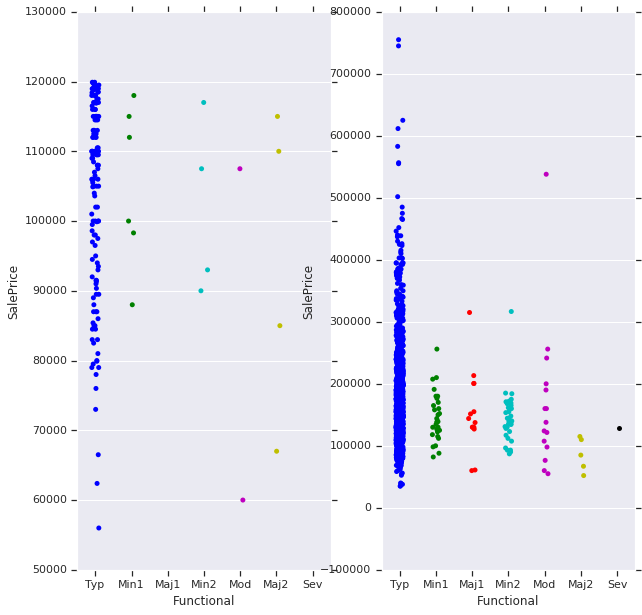

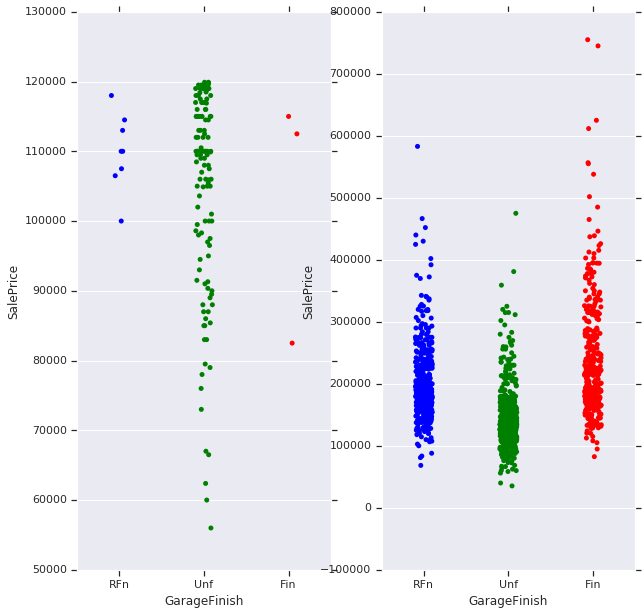

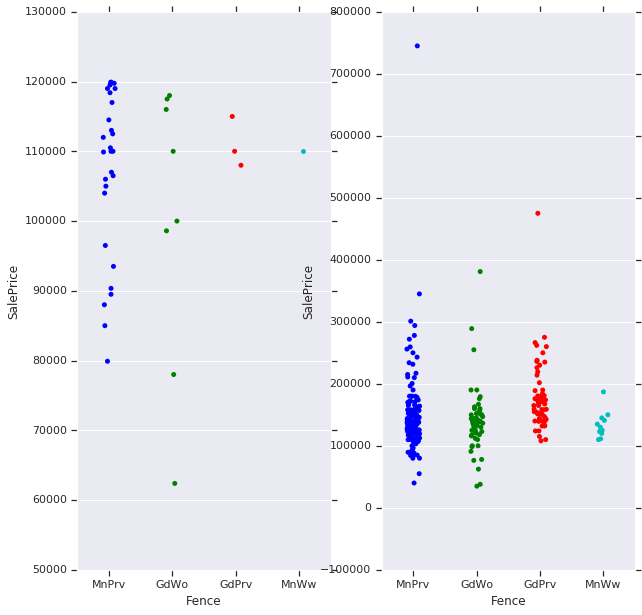

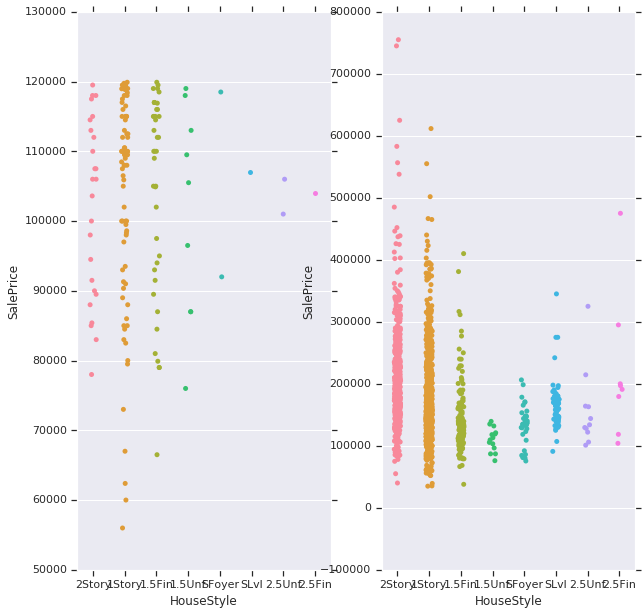

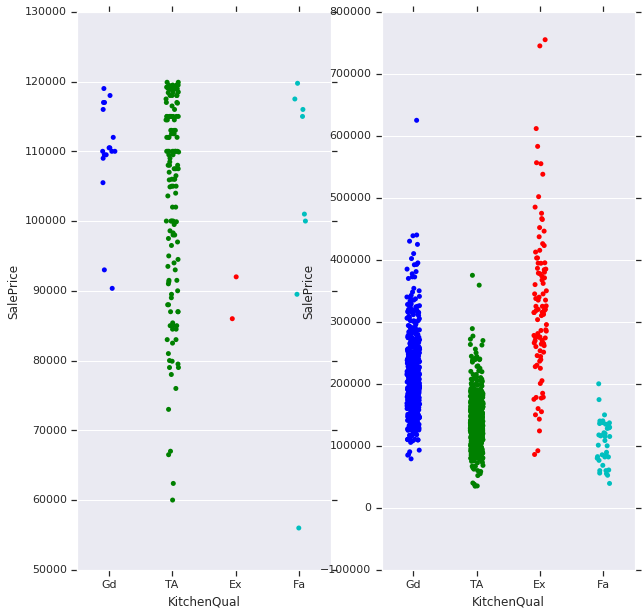

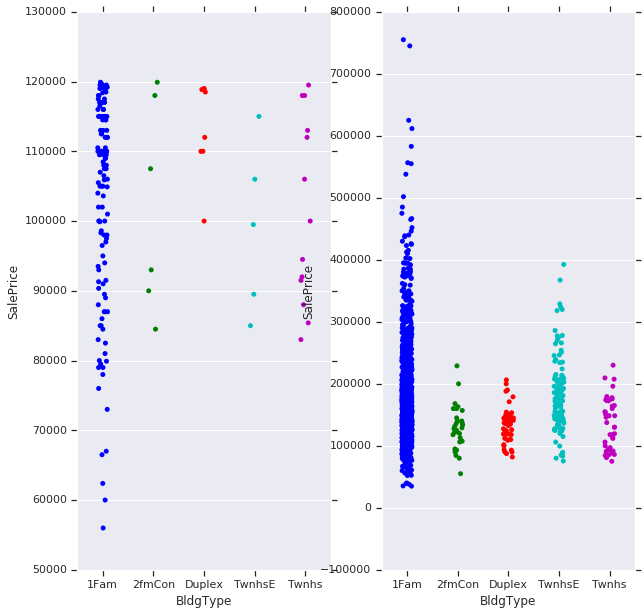

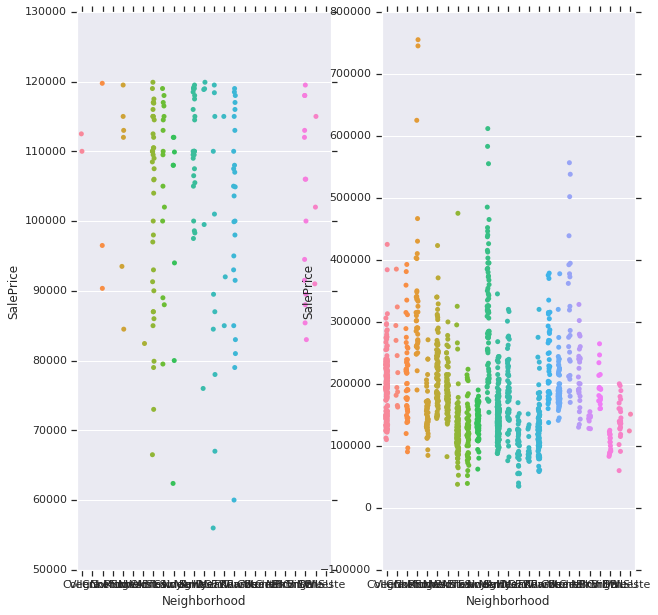

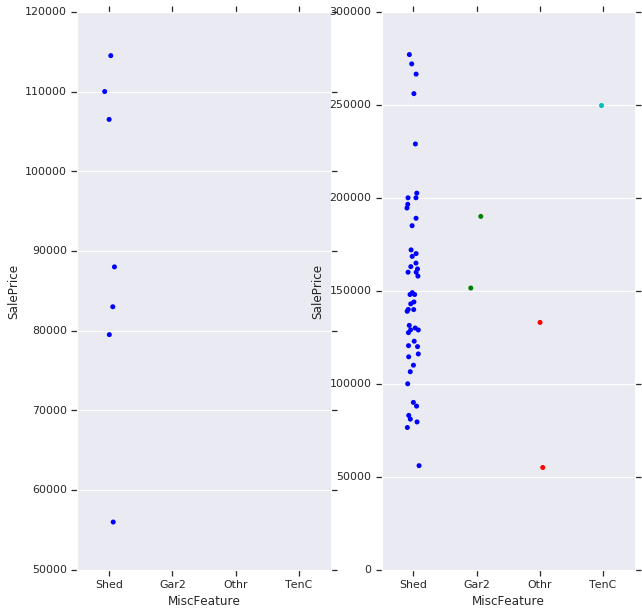

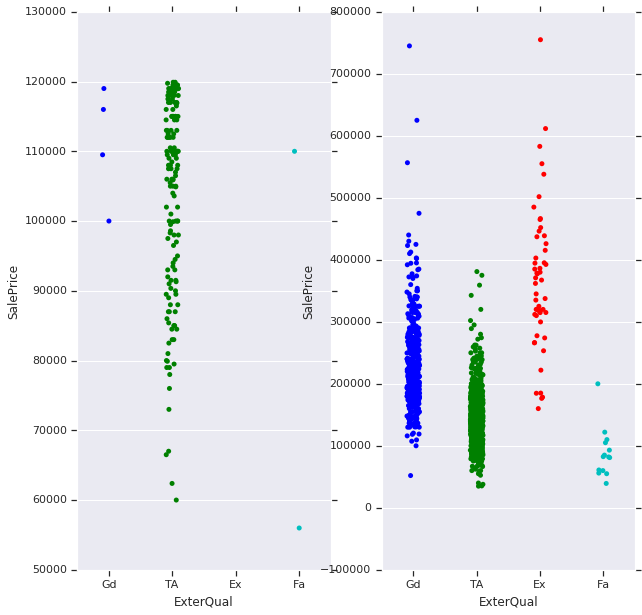

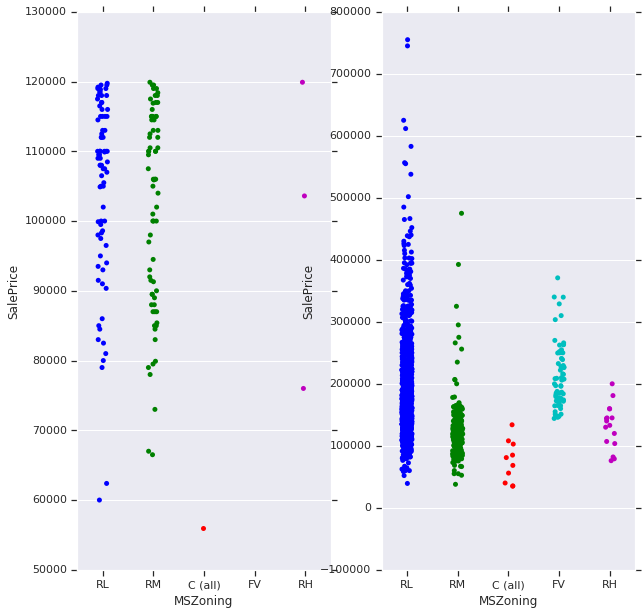

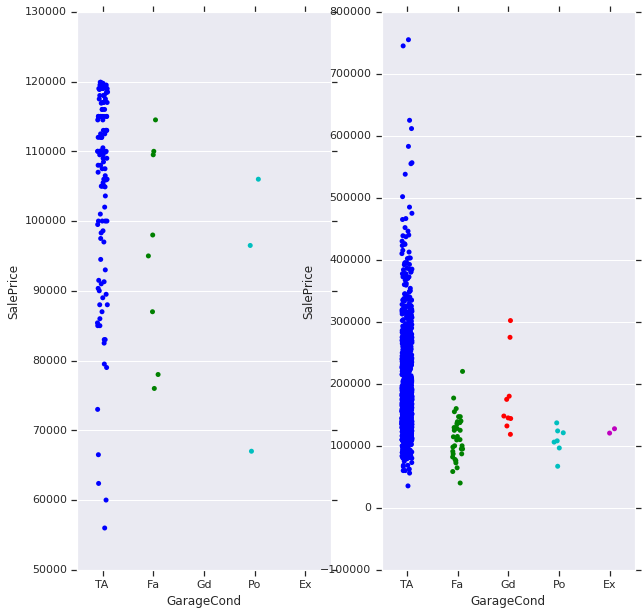

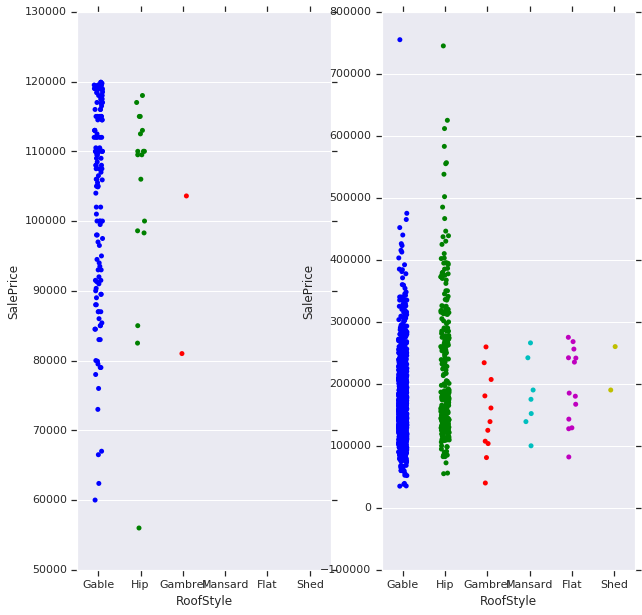

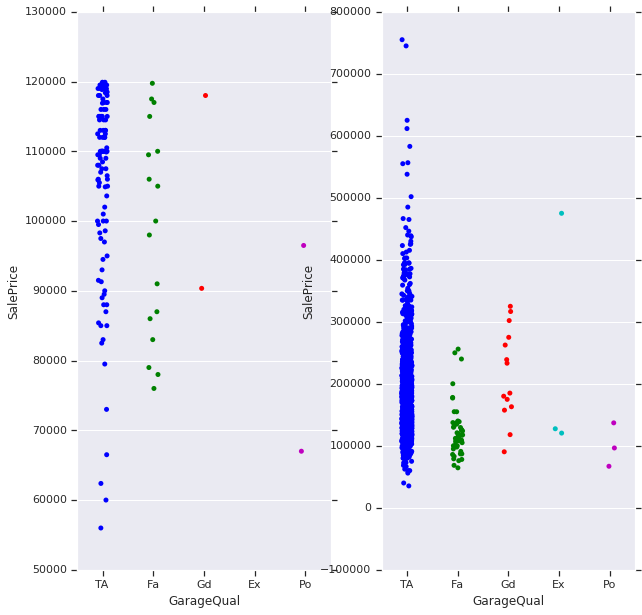

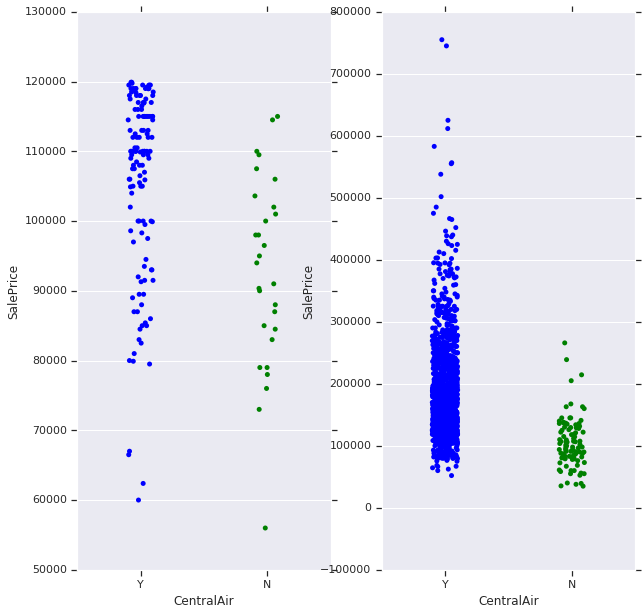

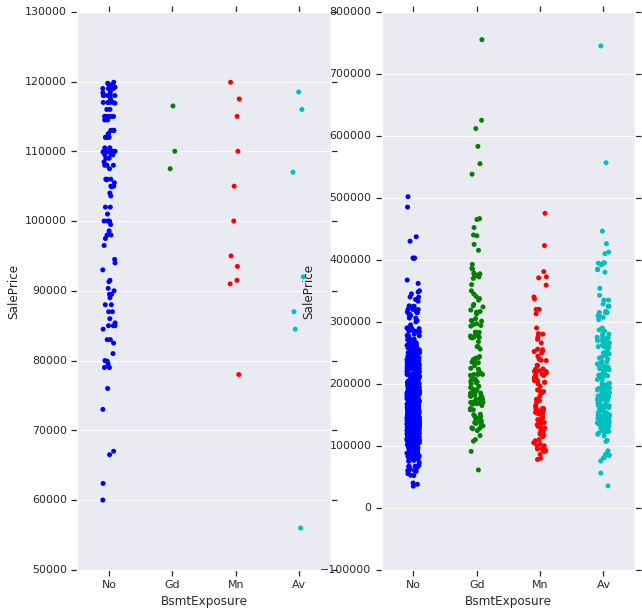

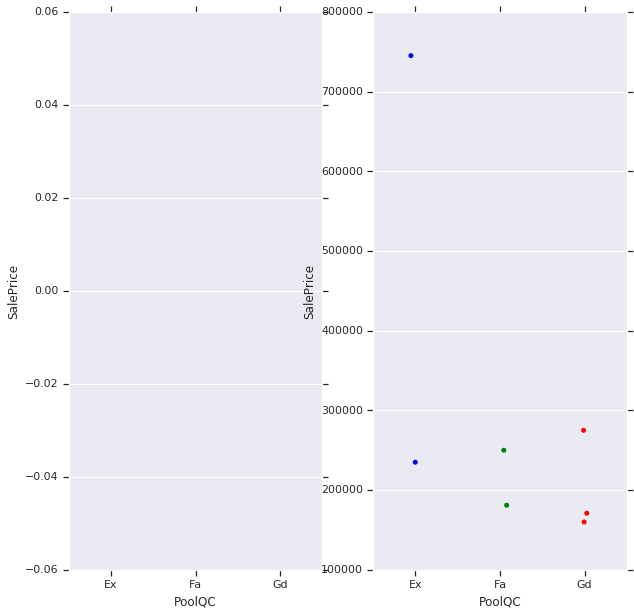

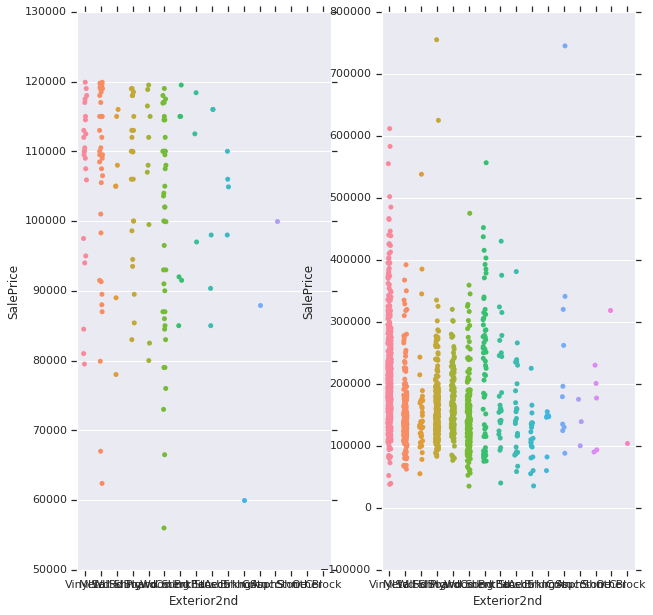

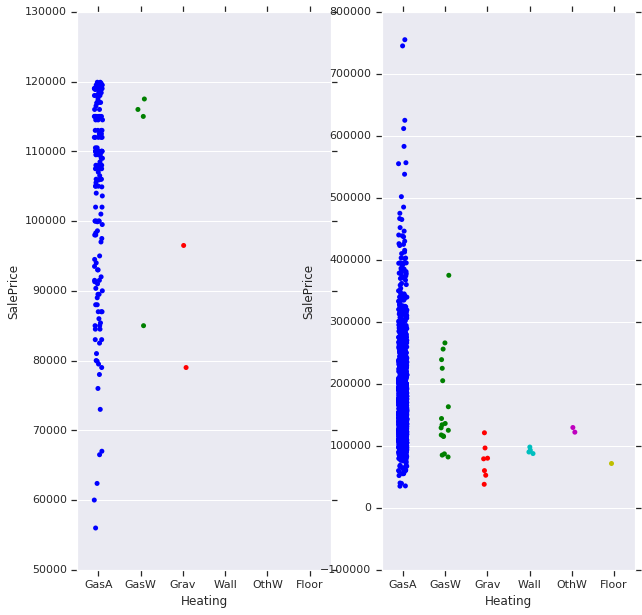

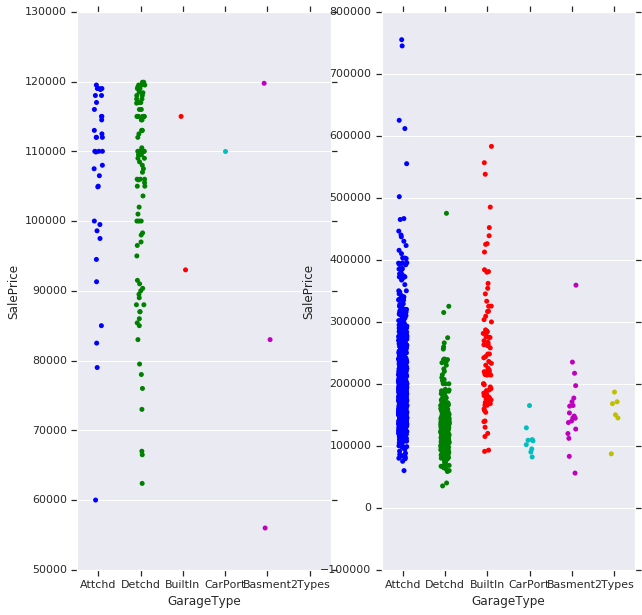

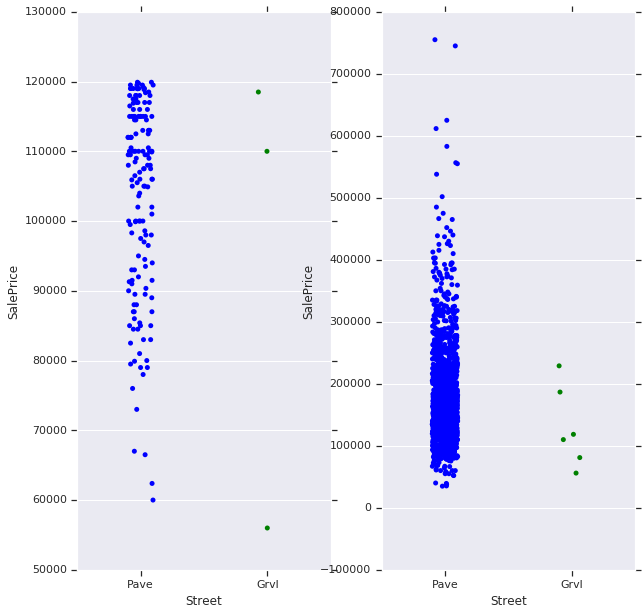

In [8]:
anaml=tdata.query("SalePrice<120000 and OverallQual>=5")
for n,i in enumerate(categorical):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    sns.stripplot(tdata[i],y='SalePrice',data=anaml)
    plt.subplot(1,2,2)
    sns.stripplot(tdata[i],y='SalePrice',data=tdata)

## Even though overall quality was greater t or equal to 5 the Selling price suffered   in the left hand side of visualizations

## The reasons can be many, some of it we can note:-

## The Zoning space in these scenarios were belonging to "Residential Low Density" not belonging to:-
###        -   C:Commercial
###        - FV	:Floating Village Residential
###        - RH	Residential High Density
### These sales lacked Paved Alley
###  Exterior quality was just Average or Typical
###      -TA kitchen quality
###      -TA basement Condition
### No misc Features in these cases
### Most cases had Garage not finished
### Belonged to MasonVenType—No stone
###                                                    ---   No brickcmmon
#### - HouseStyle was different in those scenarios
##### - RoofMaterial 

/home/bean/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


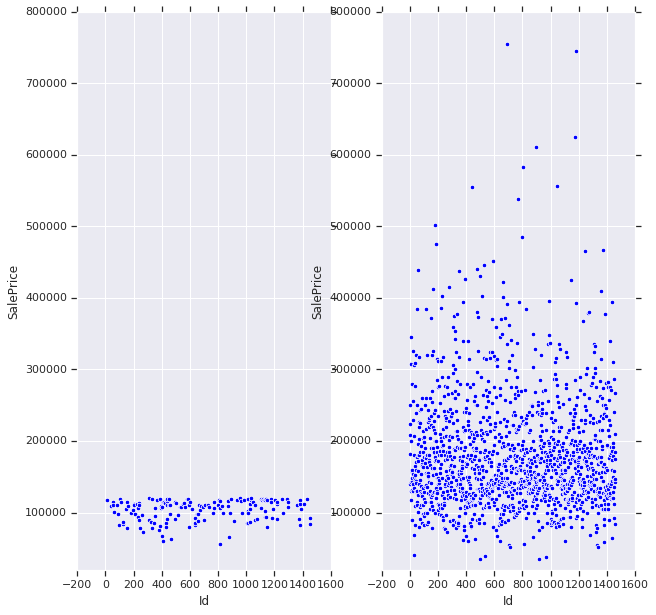

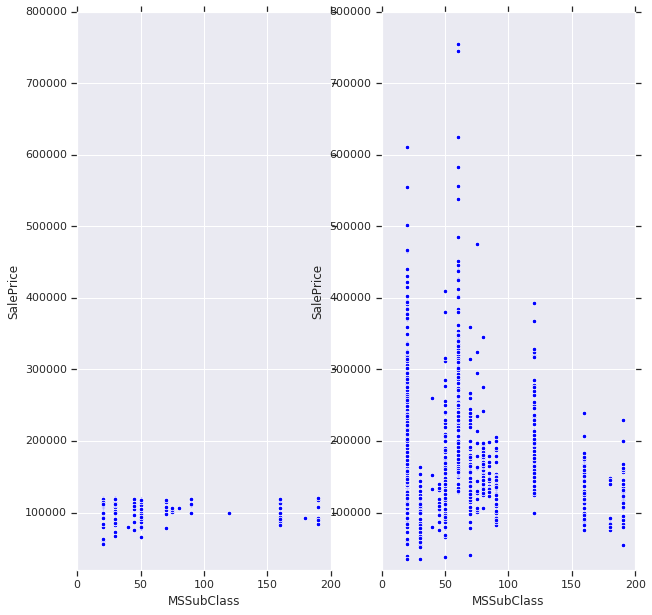

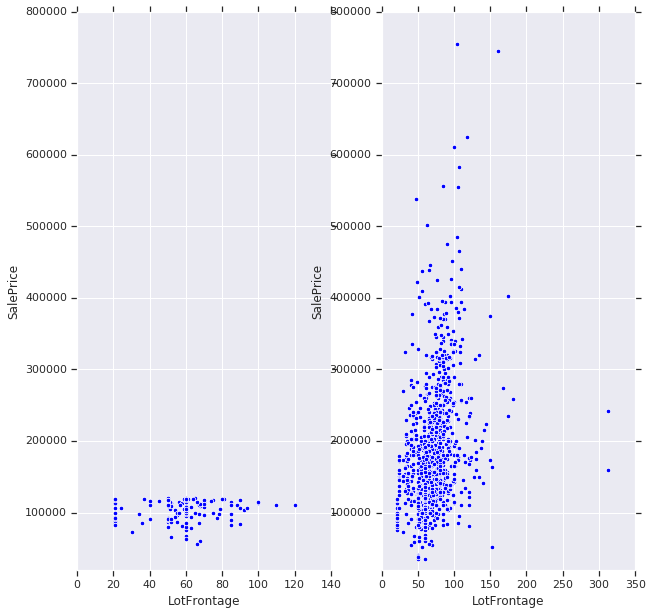

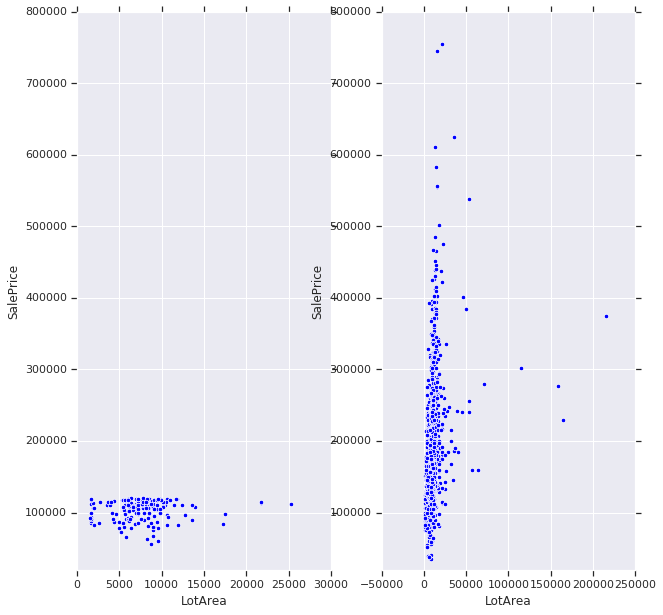

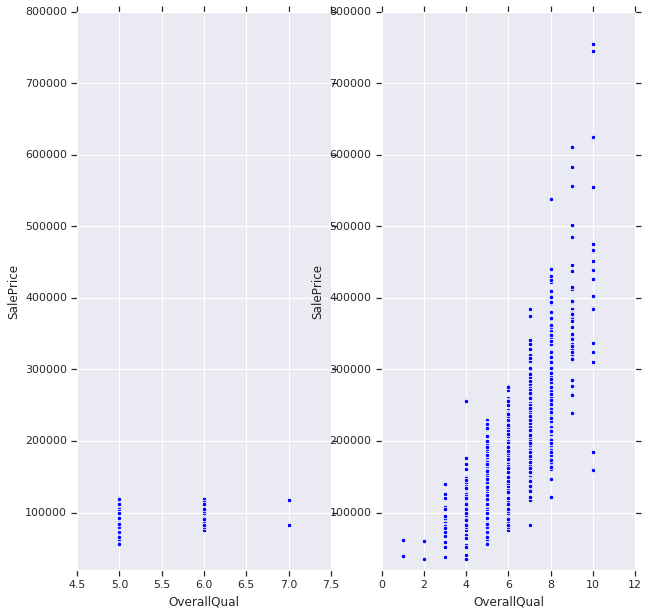

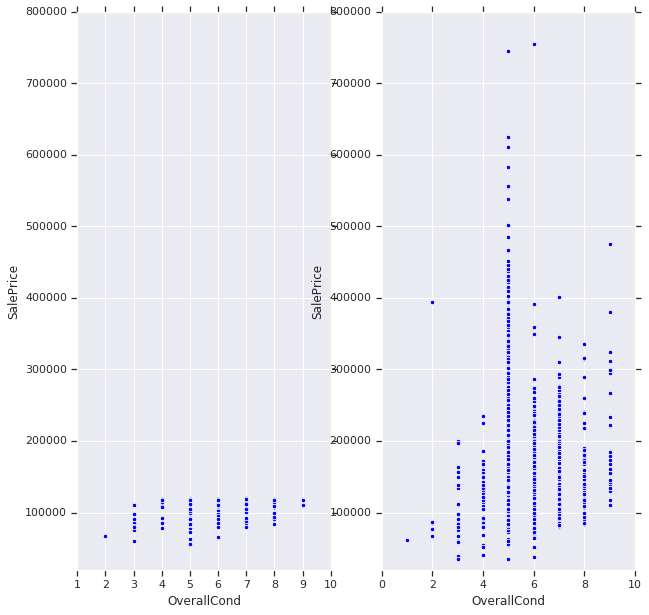

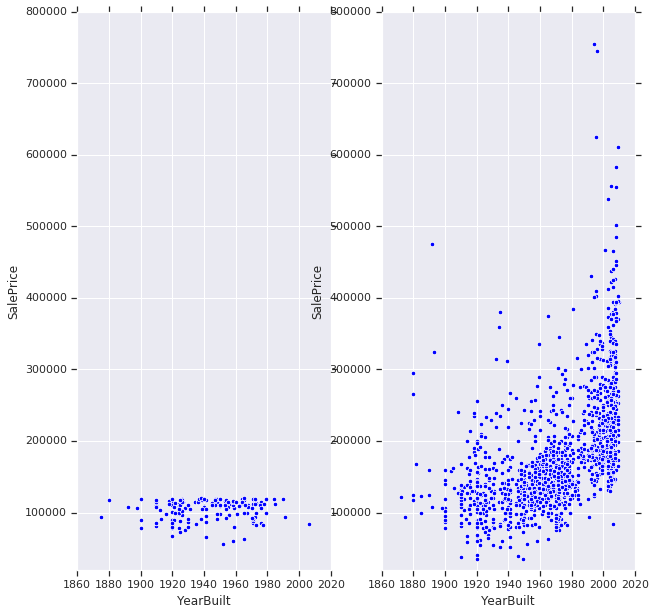

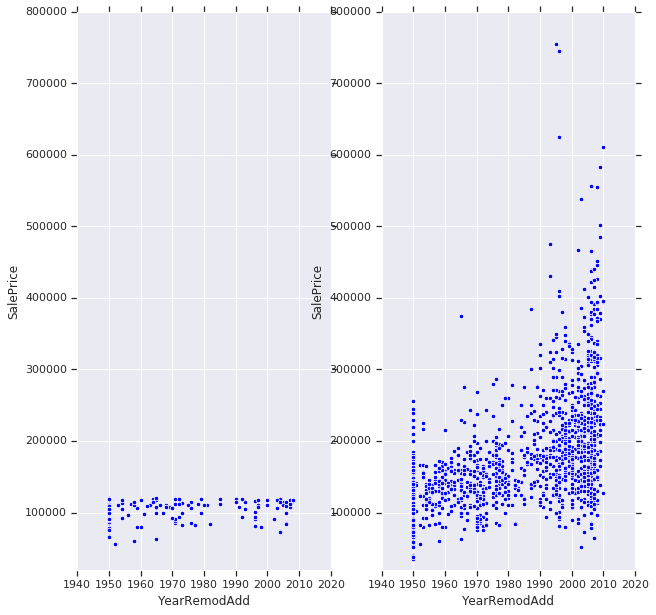

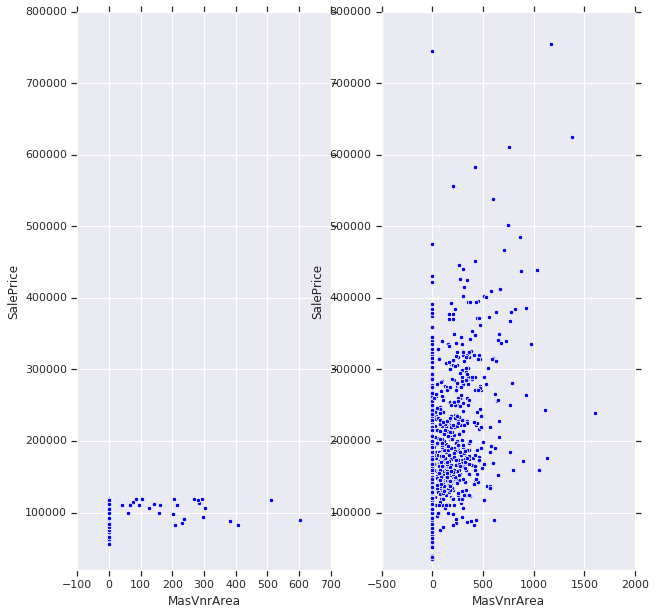

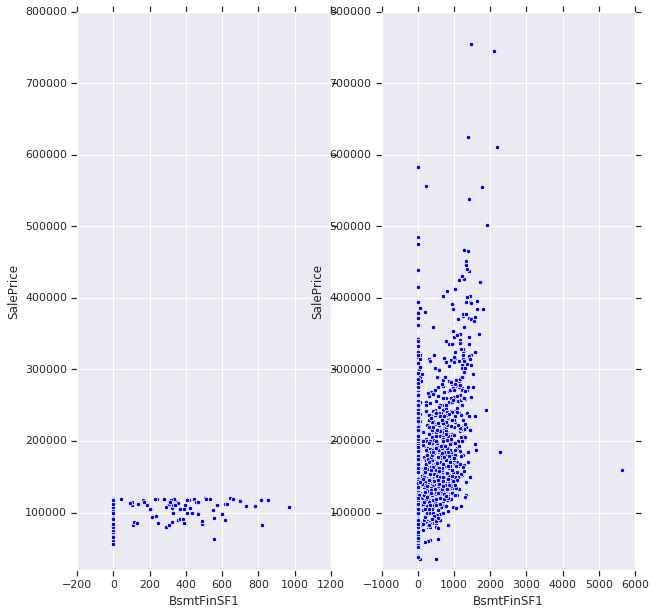

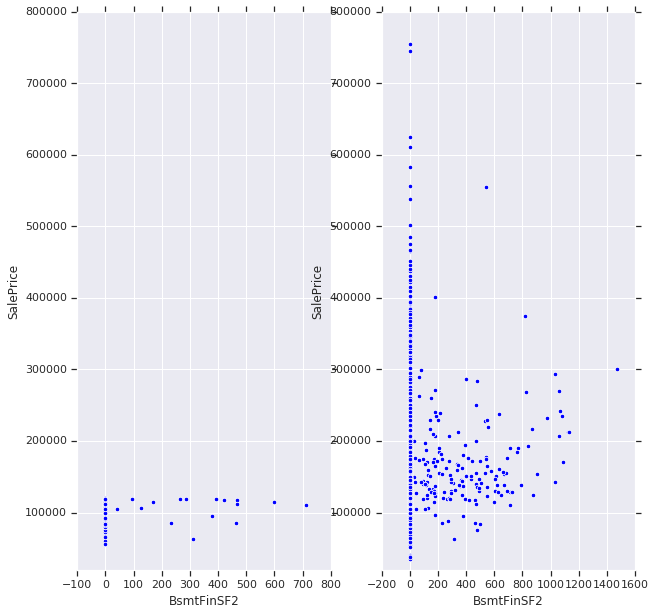

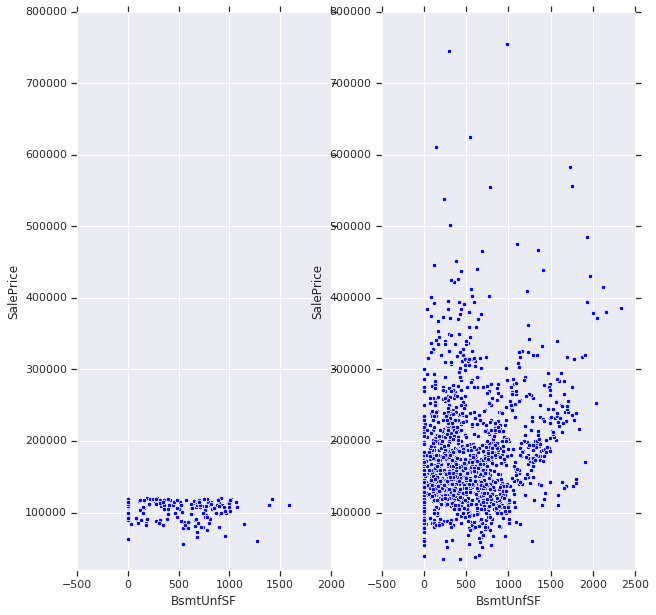

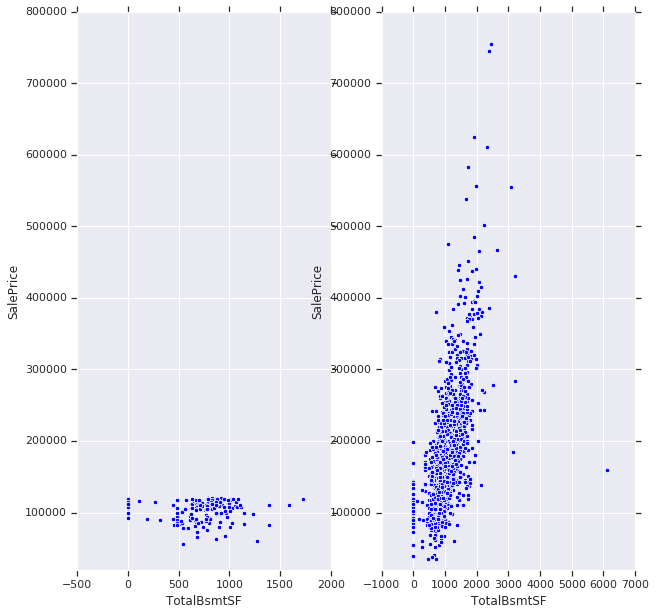

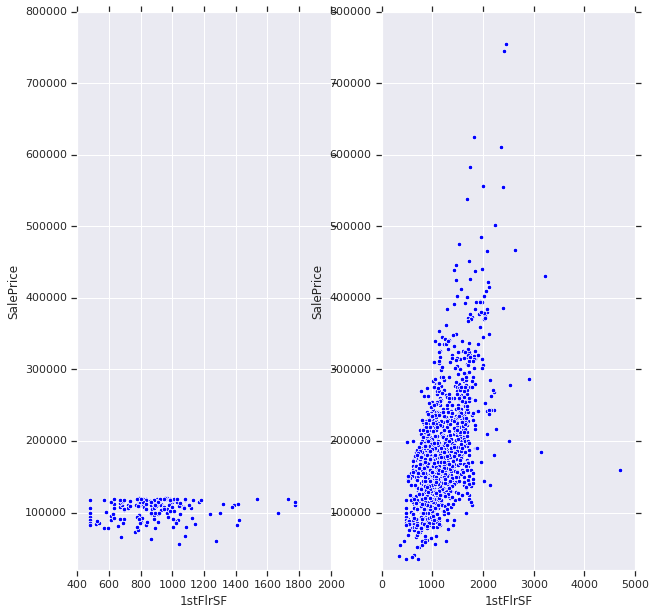

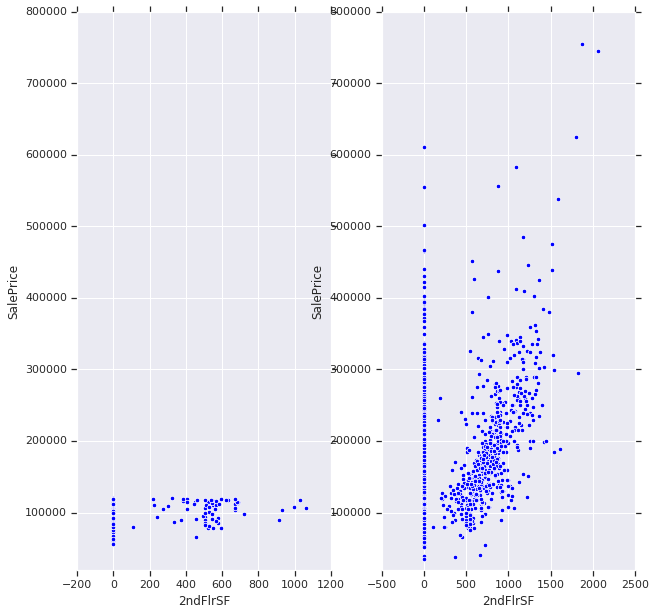

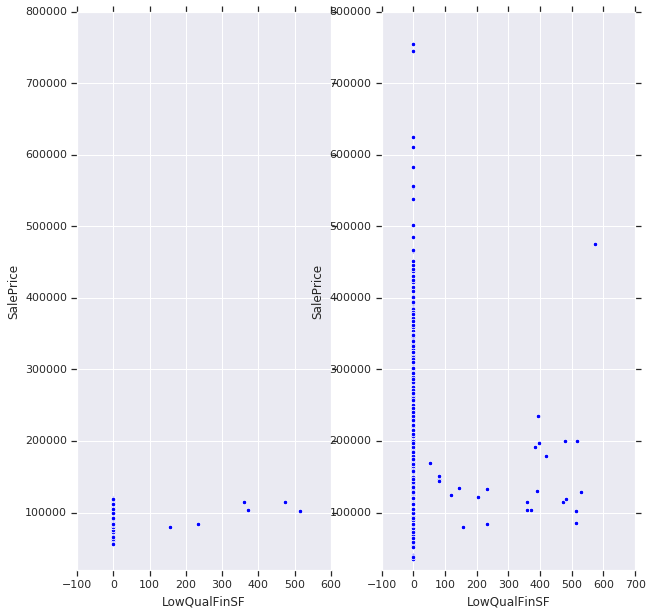

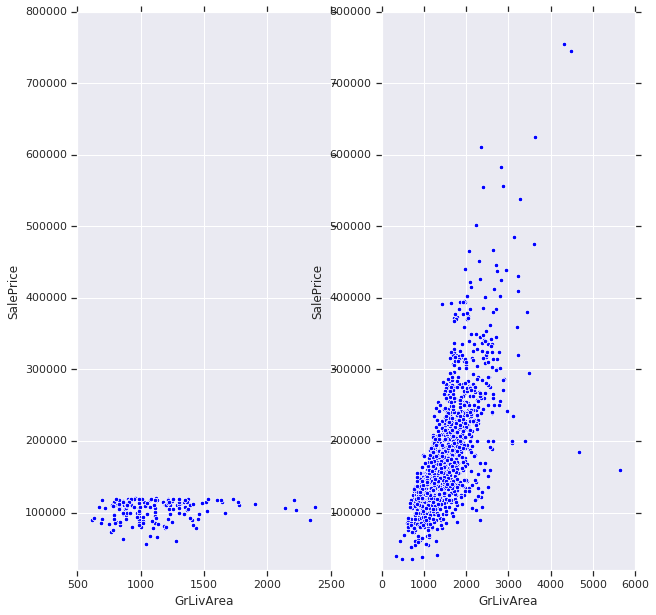

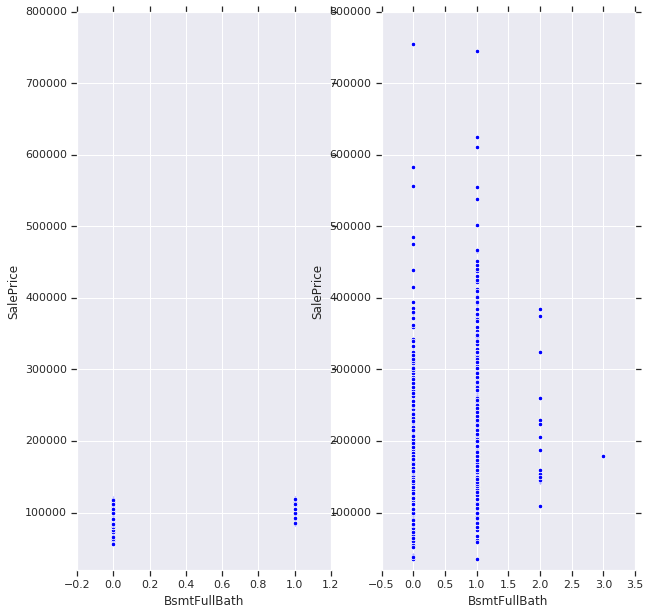

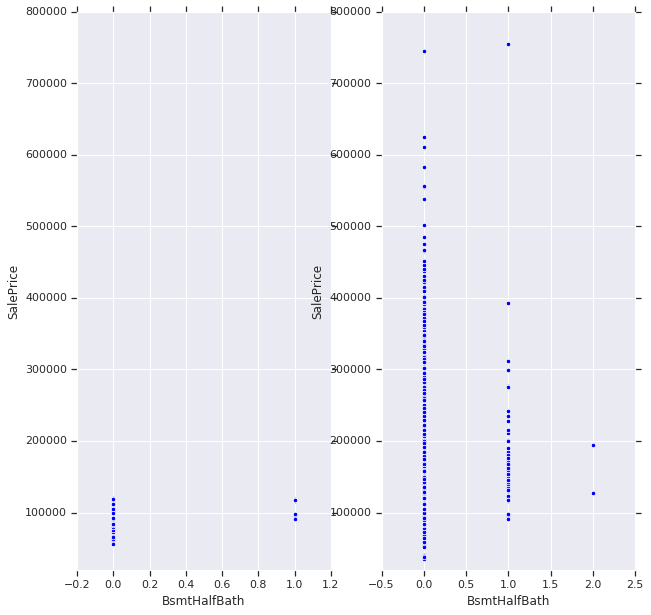

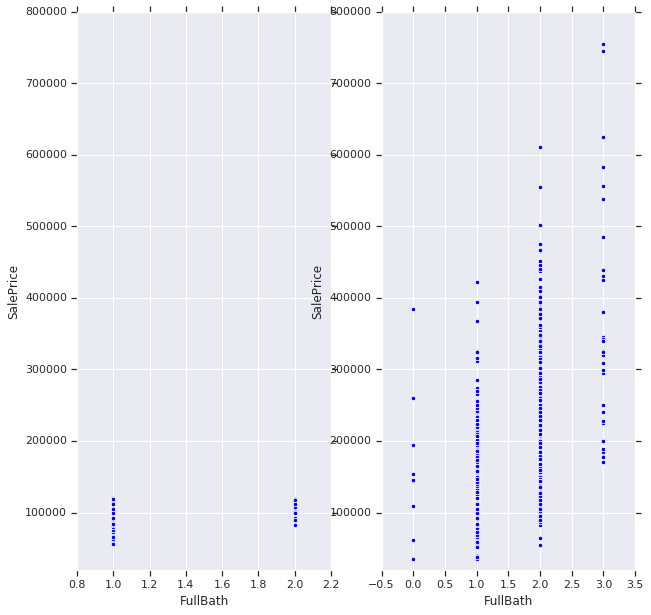

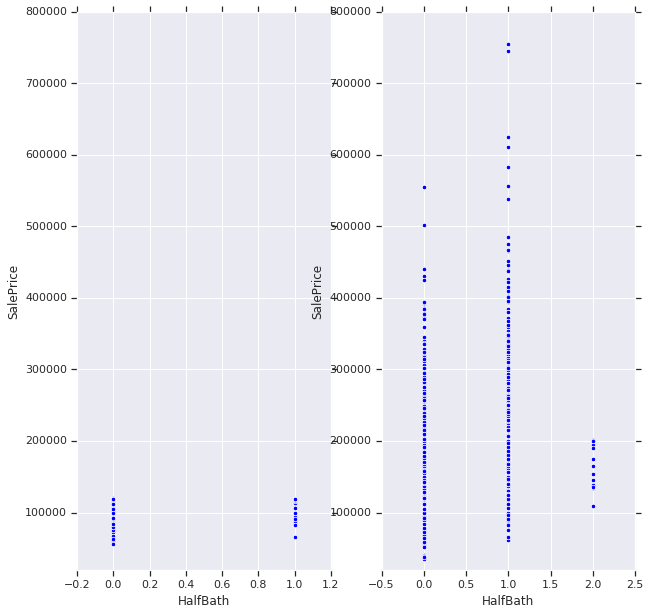

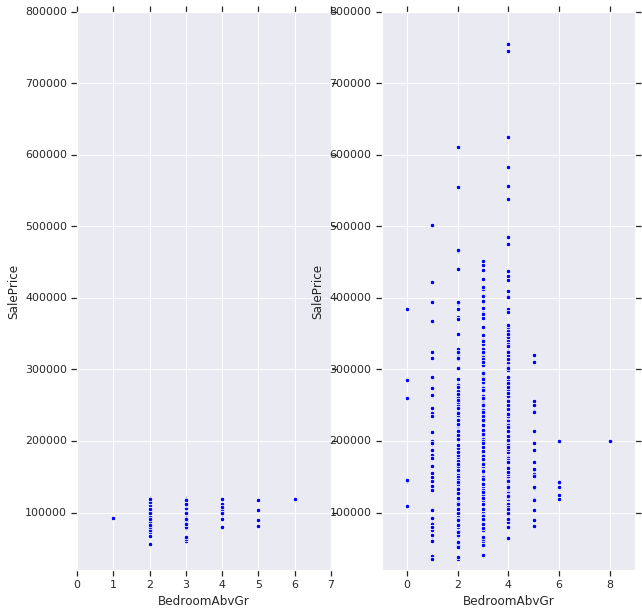

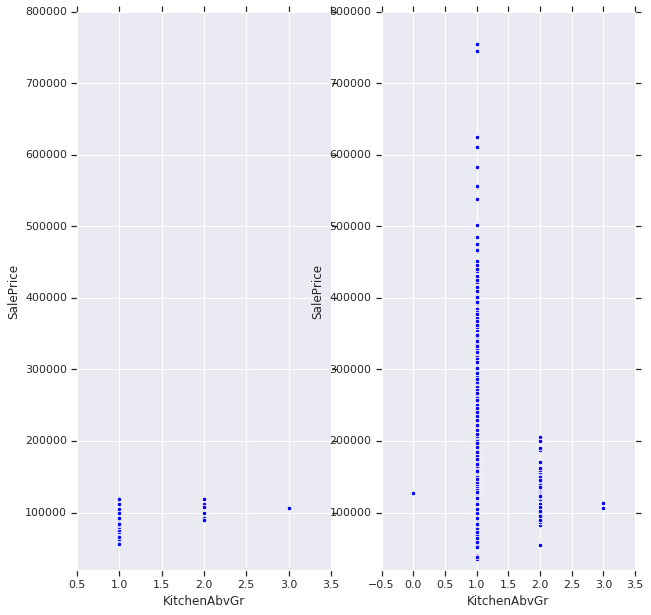

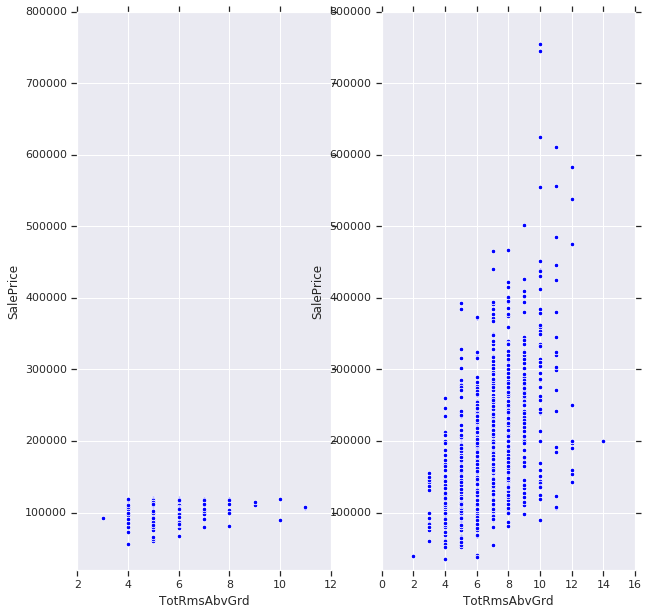

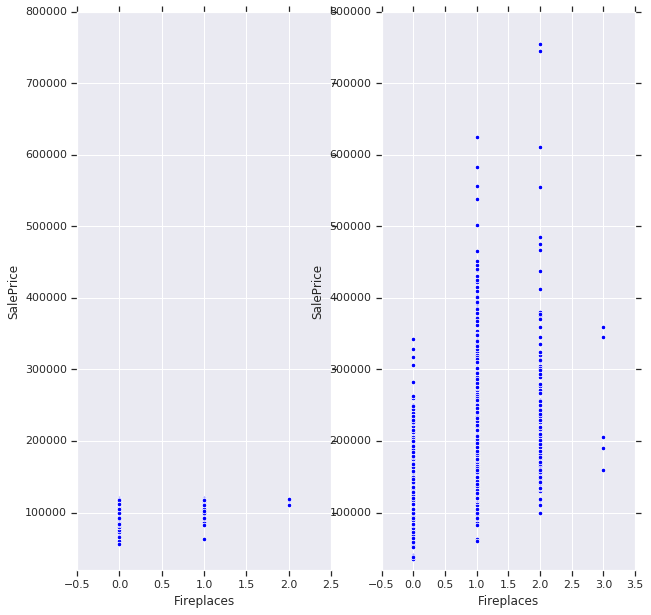

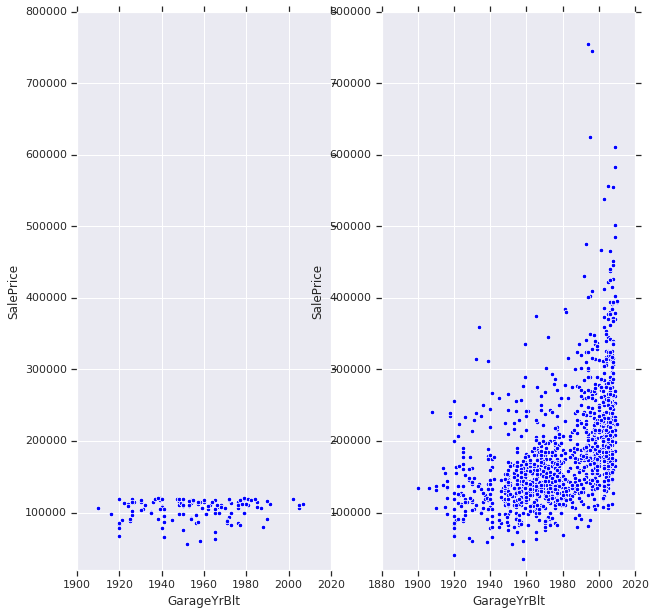

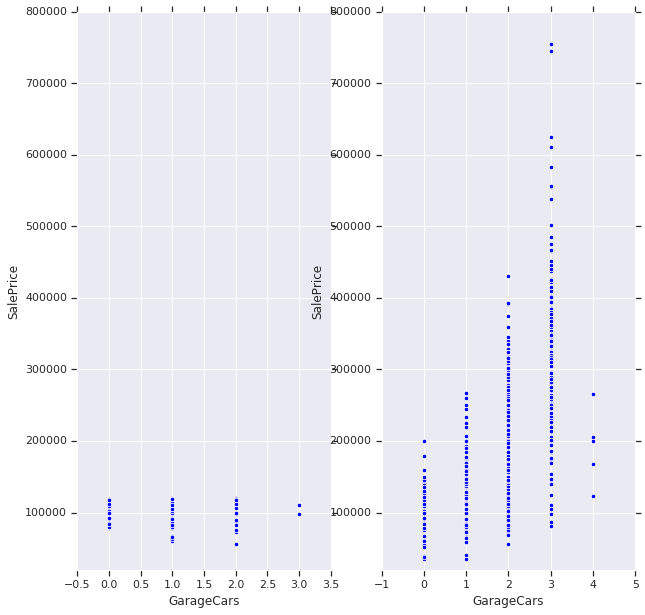

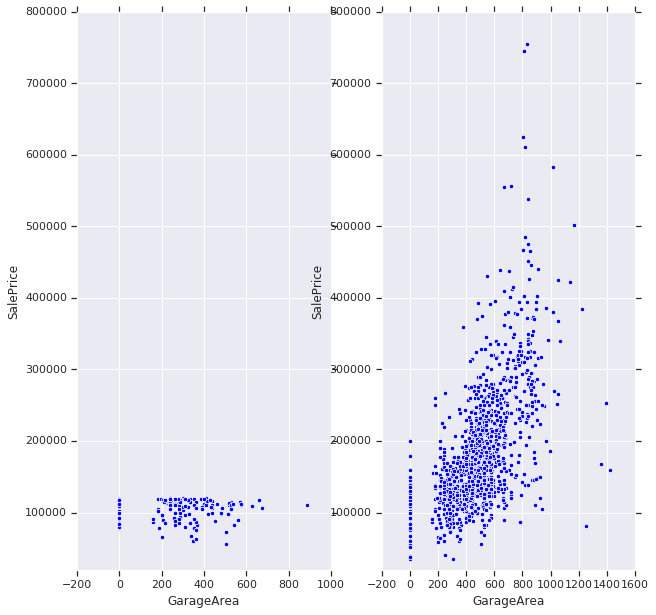

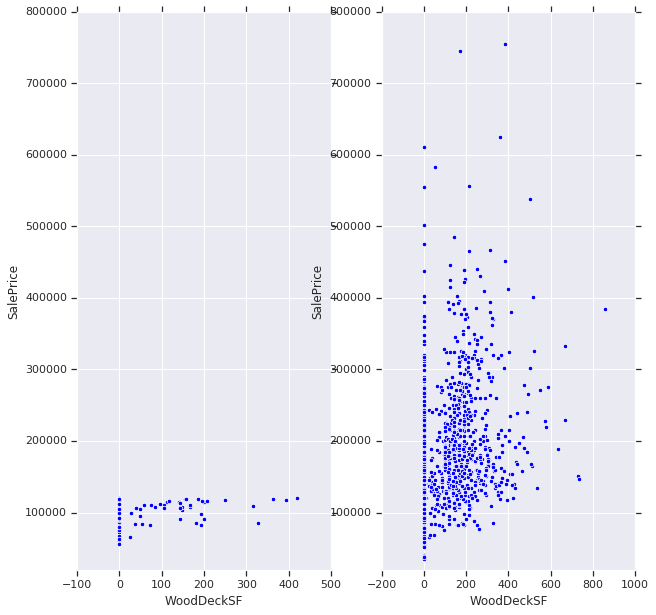

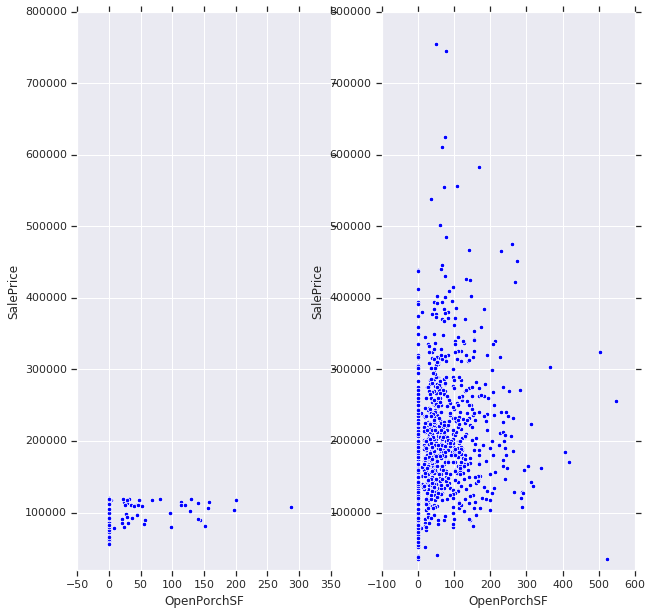

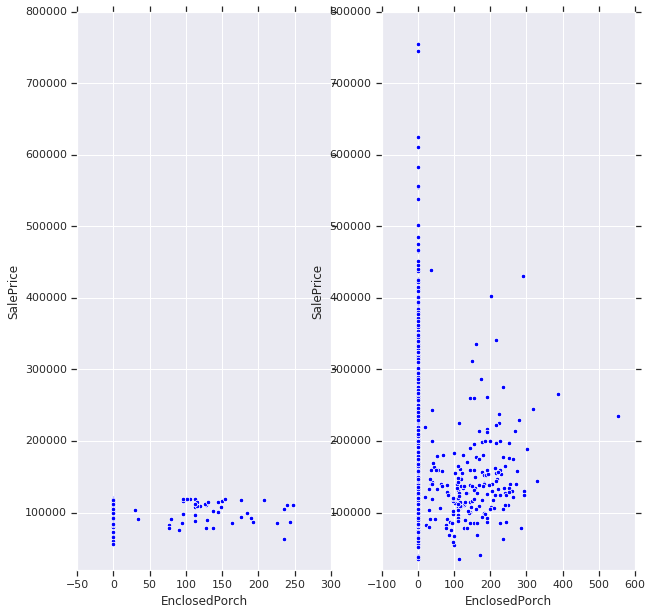

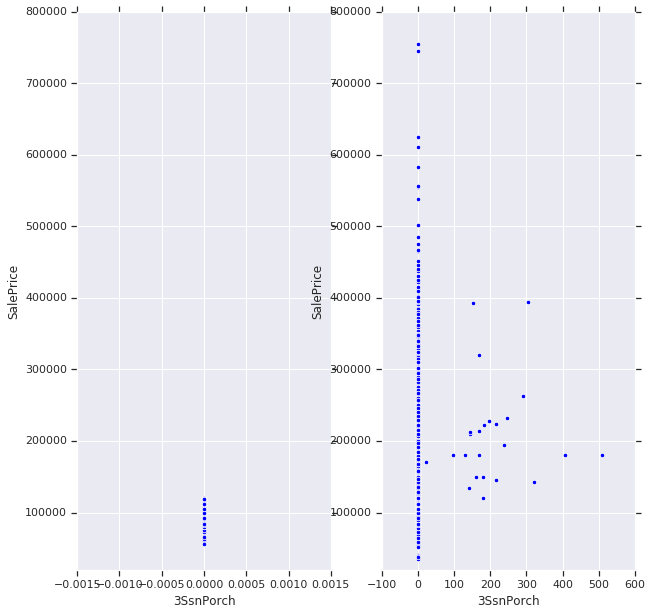

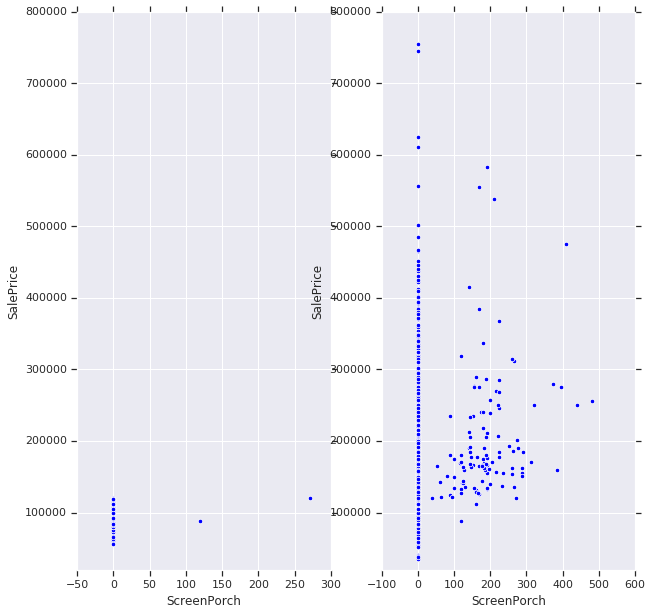

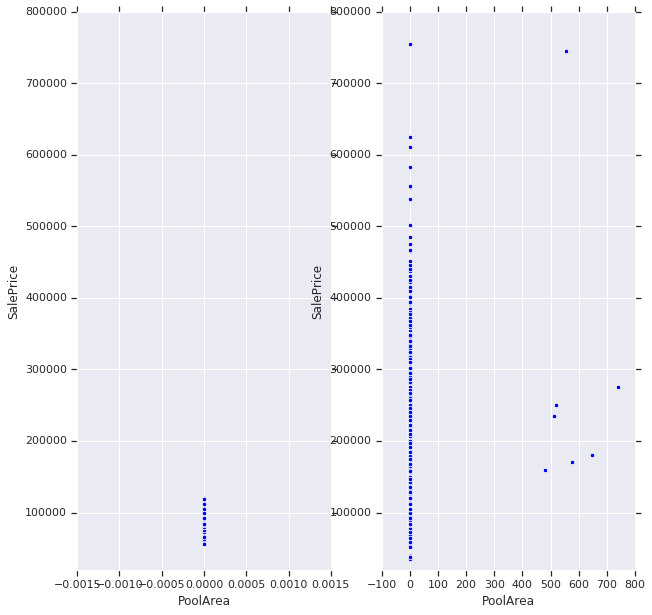

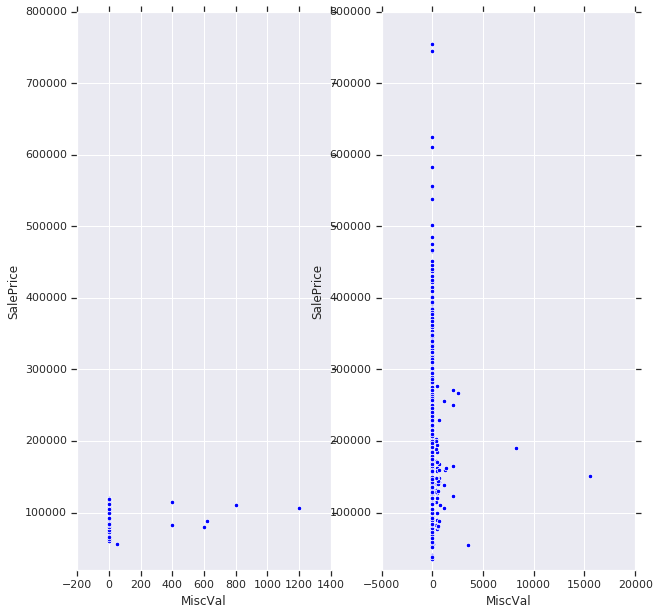

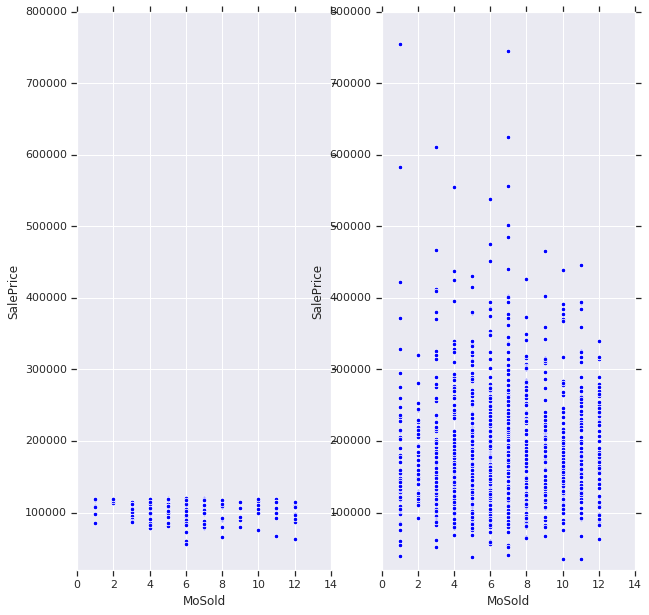

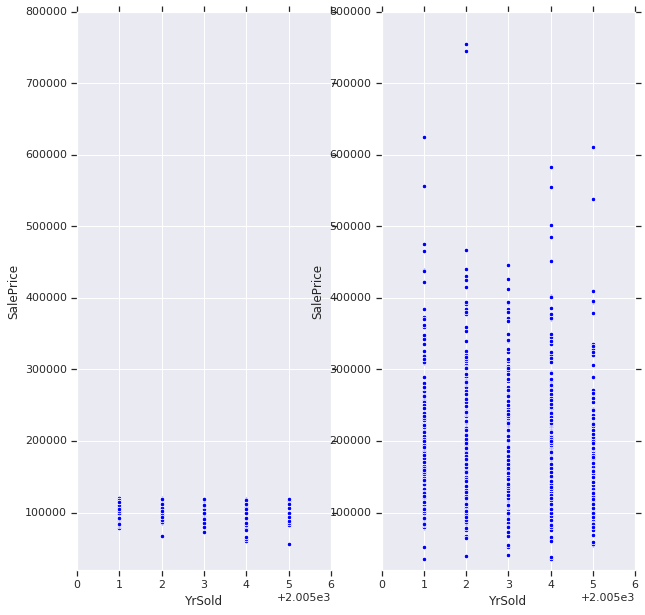

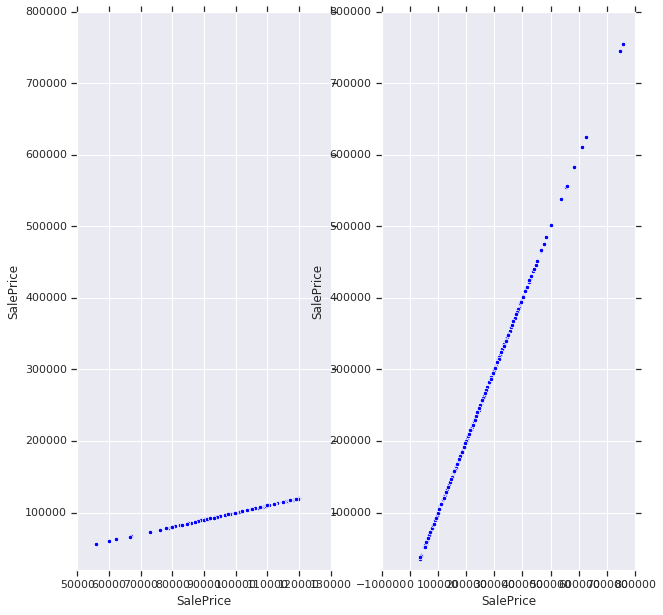

In [19]:
# anaml=tdata.query("SalePrice<120000 and OverallQual>=5")
for i in (tdata.corr().columns.values):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    sns.scatterplot(tdata[i],y='SalePrice',data=anaml)
    plt.ylim([20000,800000])
    plt.subplot(1,2,2)
    sns.scatterplot(tdata[i],y='SalePrice',data=tdata)
    plt.ylim([20000,800000])

### Data largly belongs to old houses from 1920-1980
### 2 nd floor area  is half
### Basement Surface Area is half count
### Total Room Above Ground is half
### Garage buit is old generally
### no or small fornt porch present
### Garagearea very small

# Summary


## The Data is arguably huge in terms of features , details and expansion


### There were significant revelations regarding data when the correlations came out, the 'OverallQual' showed most correlation with the 'SalePrice' which is a complex feature , we do not now how the quality was scaled and determined in the survey.

### The 'GrLivArea' was the second in the list,  which is the living Area above ground. This feature accounts for multistoried houses , however there is another categorical feature which serves similar data 'HouseStyle' 

### 'GarageCars' and 'GarageArea' accounts for number of  cars the garage can accomodate and the area of the garage, which are directly dependent to each other.

### 'TotalBsmtSF' is the measure of total surface area of the basement and "1stFlrSF' is the First floor surface area which are somewhat linked to  "LotArea"

### "YearBuilt' is directly correlated to the "SalePrice" so ,newer houses seemed to have higher prices

## Some features can be combined into one as there are some of redundant features

## Even though overall quality was greater or equal to 5 the Selling price suffered   in the Some cases

## The reasons can be many, some of it we can note:-

## The Zoning space in these scenarios were belonging to "Residential Low Density" not belonging to:-
###        -   C:Commercial
###        - FV	:Floating Village Residential
###        - RH	Residential High Density
### These sales lacked Paved Alley
###  Exterior quality was just Average or Typical
###      -TA kitchen quality
###      -TA basement Condition
### No misc Features in these cases
### Most cases had Garage not finished
### Belonged to MasonVenType—No stone
###                                                    ---   No brickcmmon
